# Final Project


In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

## Project Description

In recent years, streaming platforms with vast music libraries have become the go-to choice for music enthusiasts. However, the abundance of music options can overwhelm users when seeking new music that suits their preferences. To address this challenge, streaming services have turned to advanced techniques for music categorization, enabling personalized recommendations.

Our project revolves around analyzing the dataset collected by The Echo Nest, a renowned research group. The primary objective is to classify songs as either 'Hip-Hop' or 'Rock' without relying on audio listening. To achieve this, our project encompasses the following key steps:

1. **Data Preparation and Cleaning:** We will meticulously clean and preprocess The Echo Nest's raw music data to ensure data quality and consistency.

2. **Exploratory Data Insights:** Through exploratory data analysis (EDA), we will uncover insights, identify trends, and visualize the characteristics of the music dataset, gaining a deeper understanding of its contents.

3. **Data Enrichment:** To enhance the dataset's diversity and coverage, we will collect additional music data from reputable sources, broadening the range of songs available for classification.

4. **Machine Learning Models:** We will implement machine learning models, including classification algorithms, to predict song genres based on extracted audio features.

5. **Feature Reduction Techniques:** Employing feature reduction methods, we will optimize the dataset, improving model efficiency and reducing computational complexity.

6. **Model Evaluation:** Rigorous model evaluation will be performed using metrics such as accuracy, precision, recall, and F1-score to assess the models' performance.

7. **Personalized Recommendation System:** Utilizing the trained models, we will develop a recommendation system that delivers tailored music suggestions to users on streaming platforms.

8. **Documentation and Presentation:** Comprehensive project documentation will detail our methodology, findings, and implementation. We will create a presentation to effectively communicate the project's outcomes.

By completing this project successfully, we aim to elevate the music recommendation experience on streaming platforms, ensuring that users can effortlessly discover new music that resonates with their tastes.

---


## Interest Questions

1. Which variables have the highest correlation values (regardless of positive or negative)?
2. Are there any fields that can be removed from the DataFrame without compromising data integrity?
3. How does the acousticness variable compare between Rock and Hip-Hop?

---


## Variable Description


1. **_Track Id:_** A unique identifier for every song.

2. **_Bit Rate:_** The bit rate of the audio file, which represents the amount of data processed per unit of time. Typically measured in bits per second (bps) and indicates the audio file's quality or compression level.

3. **_Comments:_** The number of comments or user-generated text responses associated with the song, often found on online music platforms or social media.

4. **_Composer:_** The name of the composer who created the music or wrote the song.

5. **_Date Created:_** The date when the song or audio file was originally created or uploaded.

6. **_Date Recorded:_** The date when the song was recorded, which may be different from the date it was created or uploaded.

7. **_Duration:_** The length of the song or audio file in terms of time, usually measured in seconds, minutes, or hours.

8. **_Favorites:_** The number of times users have marked the song as a favorite or liked it on a music platform.

9. **_Genre top:_** The primary or main genre classification of the song, indicating the style or category of music it belongs to.

10. **_Genres:_** A list of additional genres or subgenres that the song may be associated with, providing more detailed information about its musical style.

11. **_Genres All:_** A comprehensive list of all genres and subgenres associated with the song, including both primary and secondary classifications.

12. **_Information:_** Additional information or metadata related to the song, which may include details about the artist, album, or other relevant information.

13. **_Interest:_** The level of interest or popularity of the song, often measured by metrics such as play count or user engagement.

14. **_Language Code:_** A code representing the language in which the song's lyrics or metadata are written, following language coding standards.

15. **_License:_** The type of license or legal terms associated with the song, indicating how it can be used, shared, or distributed.

16. **_Listens:_** The number of times the song has been listened to or streamed by users on a music platform.

17. **_Lyricist:_** The name of the lyricist or songwriter who wrote the lyrics for the song.

18. **_Number:_** A numerical identifier or track number within an album or playlist, used to order songs.

19. **_Publisher:_** The name of the publishing company or entity responsible for distributing or promoting the song.

20. **_Tags:_** Descriptive keywords or tags associated with the song, providing information about its content, mood, or themes.

21. **_Title:_** The title or name of the song.

22. **_Acousticness:_** A measure of the acoustic characteristics of the song, indicating how much of the sound is generated by acoustic instruments (e.g., acoustic guitars, pianos) as opposed to electronic or synthesized sounds.

23. **_Danceability:_** A measure of the song's suitability for dancing, based on factors such as tempo, rhythm, and beat.

24. **_Energy:_** A measure of the song's energy level or intensity, often associated with its loudness and speed.

25. **_Instrumentalness:_** A measure of the song's instrumental nature, indicating the presence of vocals (or lack thereof) in the track.

26. **_Liveness:_** A measure of the song's perceived live performance quality, indicating the presence of audience sounds or live elements.

27. **_Speechiness:_** A measure of the song's speech-like elements, such as spoken words or vocal components that are not sung.

28. **_Tempo:_** The tempo of the song, representing its speed or beats per minute (BPM).

29. **_Valence:_** A measure of the song's mood or emotional positivity, with higher values indicating a more positive or joyful mood and lower values indicating a more negative or sad mood.

---


## Data Import

For this project, we will mainly be using two data files: `fma-rock-vs-hiphop.csv` and `echonest-metrics.json`.


In [241]:
df_csv = pd.read_csv("../data/fma-rock-vs-hiphop.csv")
df_json = pd.read_json("../data/echonest-metrics.json", precise_float=True)

### CSV File

The `fma-rock-vs-hiphop.csv` file contains some general information for songs, having $17,734$ songs and $21$ variables.

<!-- The variables it contains are:

1. **_Track Id_**
2. **_Bit Rate_**
3. **_Comments_**
4. **_Composer_**
5. **_Date Created_**
6. **_Date Recorded_**
7. **_Duration_**
8. **_Favorites_**
9. **_Genre Top_**
10. **_Genres_**
11. **_Genres All_**
12. **_Information_**
13. **_Interests_**
14. **_Language Code_**
15. **_License_**
16. **_Listens_**
17. **_Lyricist_**
18. **_Number_**
19. **_Publisher_**
20. **_Tags_**
21. **_Title_** -->


In [242]:
df_csv.head()

track_id  bit_rate  comments        composer         date_created  \
0       135    256000         1             NaN  2008-11-26 01:43:26   
1       136    256000         1             NaN  2008-11-26 01:43:35   
2       151    192000         0             NaN  2008-11-26 01:44:55   
3       152    192000         0             NaN  2008-11-26 01:44:58   
4       153    256000         0  Arc and Sender  2008-11-26 01:45:00   

         date_recorded  duration  favorites genre_top    genres  ...  \
0  2008-11-26 00:00:00       837          0      Rock  [45, 58]  ...   
1  2008-11-26 00:00:00       509          0      Rock  [45, 58]  ...   
2                  NaN       192          0      Rock      [25]  ...   
3                  NaN       193          0      Rock      [25]  ...   
4  2008-11-26 00:00:00       405          5      Rock      [26]  ...   

  information interest  language_code  \
0         NaN     2484             en   
1         NaN     1948             en   
2         NaN      701             en   
3         NaN      637             en   
4         NaN      354             en   

                                             license listens  lyricist number  \
0  Attribution-NonCommercial-ShareAlike 3.0 Inter...    1832       NaN      0   
1  Attribution-NonCommercial-ShareAlike 3.0 Inter...    1498       NaN      0   
2  Attribution-NonCommercial-ShareAlike 3.0 Inter...     148       NaN      4   
3  Attribution-NonCommercial-ShareAlike 3.0 Inter...      98       NaN     11   
4  Attribution-NonCommercial-NoDerivatives (aka M...     424       NaN      2   

   publisher tags                       title  
0        NaN   []                Father's Day  
1        NaN   []  Peel Back The Mountain Sky  
2        NaN   []                 Untitled 04  
3        NaN   []                 Untitled 11  
4        NaN   []          Hundred-Year Flood  

[5 rows x 21 columns]

In [243]:
df_csv.shape

(17734, 21)

In [244]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

### JSON File

On the other hand, `echonest-metrics.json` file contains song metadata for $13,129$ songs across $9$ variables.


In [245]:
df_json.head()

track_id  acousticness  danceability    energy  instrumentalness  liveness  \
0         2      0.416675      0.675894  0.634476          0.010628  0.177647   
1         3      0.374408      0.528643  0.817461          0.001851  0.105880   
2         5      0.043567      0.745566  0.701470          0.000697  0.373143   
3        10      0.951670      0.658179  0.924525          0.965427  0.115474   
4       134      0.452217      0.513238  0.560410          0.019443  0.096567   

   speechiness    tempo   valence  
0     0.159310  165.922  0.576661  
1     0.461818  126.957  0.269240  
2     0.124595  100.260  0.621661  
3     0.032985  111.562  0.963590  
4     0.525519  114.290  0.894072

In [246]:
df_json.shape

(13129, 9)

In [247]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13129 entries, 0 to 13128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          13129 non-null  int64  
 1   acousticness      13129 non-null  float64
 2   danceability      13129 non-null  float64
 3   energy            13129 non-null  float64
 4   instrumentalness  13129 non-null  float64
 5   liveness          13129 non-null  float64
 6   speechiness       13129 non-null  float64
 7   tempo             13129 non-null  float64
 8   valence           13129 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


After observing both DataFrames we discover that they both share the `track_id` attribute, which can be used in order to combine them.

---


## DataFrame Combination

After some research, we found that Pandas has 3 different functions used to combine DataFrames:

- `concat()`
- `merge()`
- `join()`

All of them will be tested to find the most optimal one.


As an initial preventive measure, we will be performing a test to find how many common `track_id` values are found along both DataFrames.

This number will be used as reference for how many rows the combined table should have.


In [248]:
count = 0
for id in df_json.track_id:
    if id in df_csv.track_id.values:
        count = count + 1

print(count)

4802


This means that any combination of the `.csv` and the `.json` DataFrames should have $4802$ rows, plus $29$ attribute columns.


### Concat

The first tested function is `concat()`.


In [249]:
df_concat_inner = pd.concat([df_csv, df_json], axis=1, join="inner")
df_concat_inner.head()

track_id  bit_rate  comments        composer         date_created  \
0      135    256000         1             NaN  2008-11-26 01:43:26   
1      136    256000         1             NaN  2008-11-26 01:43:35   
2      151    192000         0             NaN  2008-11-26 01:44:55   
3      152    192000         0             NaN  2008-11-26 01:44:58   
4      153    256000         0  Arc and Sender  2008-11-26 01:45:00   

         date_recorded  duration  favorites genre_top    genres  ...  \
0  2008-11-26 00:00:00       837          0      Rock  [45, 58]  ...   
1  2008-11-26 00:00:00       509          0      Rock  [45, 58]  ...   
2                  NaN       192          0      Rock      [25]  ...   
3                  NaN       193          0      Rock      [25]  ...   
4  2008-11-26 00:00:00       405          5      Rock      [26]  ...   

                        title track_id  acousticness danceability    energy  \
0                Father's Day        2      0.416675     0.675894  0.634476   
1  Peel Back The Mountain Sky        3      0.374408     0.528643  0.817461   
2                 Untitled 04        5      0.043567     0.745566  0.701470   
3                 Untitled 11       10      0.951670     0.658179  0.924525   
4          Hundred-Year Flood      134      0.452217     0.513238  0.560410   

   instrumentalness  liveness  speechiness    tempo   valence  
0          0.010628  0.177647     0.159310  165.922  0.576661  
1          0.001851  0.105880     0.461818  126.957  0.269240  
2          0.000697  0.373143     0.124595  100.260  0.621661  
3          0.965427  0.115474     0.032985  111.562  0.963590  
4          0.019443  0.096567     0.525519  114.290  0.894072  

[5 rows x 30 columns]

In [250]:
df_concat_outer = pd.concat([df_csv, df_json], axis=1, join="outer")
df_concat_outer.head()

track_id  bit_rate  comments        composer         date_created  \
0      135    256000         1             NaN  2008-11-26 01:43:26   
1      136    256000         1             NaN  2008-11-26 01:43:35   
2      151    192000         0             NaN  2008-11-26 01:44:55   
3      152    192000         0             NaN  2008-11-26 01:44:58   
4      153    256000         0  Arc and Sender  2008-11-26 01:45:00   

         date_recorded  duration  favorites genre_top    genres  ...  \
0  2008-11-26 00:00:00       837          0      Rock  [45, 58]  ...   
1  2008-11-26 00:00:00       509          0      Rock  [45, 58]  ...   
2                  NaN       192          0      Rock      [25]  ...   
3                  NaN       193          0      Rock      [25]  ...   
4  2008-11-26 00:00:00       405          5      Rock      [26]  ...   

                        title track_id  acousticness danceability    energy  \
0                Father's Day      2.0      0.416675     0.675894  0.634476   
1  Peel Back The Mountain Sky      3.0      0.374408     0.528643  0.817461   
2                 Untitled 04      5.0      0.043567     0.745566  0.701470   
3                 Untitled 11     10.0      0.951670     0.658179  0.924525   
4          Hundred-Year Flood    134.0      0.452217     0.513238  0.560410   

   instrumentalness  liveness  speechiness    tempo   valence  
0          0.010628  0.177647     0.159310  165.922  0.576661  
1          0.001851  0.105880     0.461818  126.957  0.269240  
2          0.000697  0.373143     0.124595  100.260  0.621661  
3          0.965427  0.115474     0.032985  111.562  0.963590  
4          0.019443  0.096567     0.525519  114.290  0.894072  

[5 rows x 30 columns]

In [251]:
df_concat_inner.shape

(13129, 30)

In [252]:
df_concat_outer.shape

(17734, 30)

As we can see, this method is not appropriate for a variety of reasons. First and foremost, there seems to be a problem with the columns of the new DataFrame, due to the `track_id` field being duplicated. Additionaly, the intended number of columns is far from what the calculated count resulted in, meaning thousands of songs have several `Nan` attributes.

The `concat()` function will not work with either inner nor outer joins, because it actually combines DataFrames in an horizontal level, not really looking for common attributes between them.


### Merge


Now the `merge()` function will be tested.


In [253]:
df_merge = pd.merge(df_csv, df_json, on="track_id")

In [254]:
df_merge.shape

(4802, 29)

Regarding the result provided from the `merge()` function, they appear to be in line with the previously established requierements, meaning we now have our first complete DataFrame with all song attributes.


In [255]:
music_data = df_merge

---


## Exploration Data Analysis

After having a first version of our data, we want to visualize it to have an idea of all the attributes.


In [256]:
music_data_original = music_data.copy()

In [257]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   bit_rate          4802 non-null   int64  
 2   comments          4802 non-null   int64  
 3   composer          106 non-null    object 
 4   date_created      4802 non-null   object 
 5   date_recorded     1234 non-null   object 
 6   duration          4802 non-null   int64  
 7   favorites         4802 non-null   int64  
 8   genre_top         4802 non-null   object 
 9   genres            4802 non-null   object 
 10  genres_all        4802 non-null   object 
 11  information       334 non-null    object 
 12  interest          4802 non-null   int64  
 13  language_code     2599 non-null   object 
 14  license           4789 non-null   object 
 15  listens           4802 non-null   int64  
 16  lyricist          13 non-null     object 


### Nan Attributes Removal


The first thing we need to get an idea of is how many `Nan` values each of the attributes has.


In [258]:
music_data.isna().sum()

track_id               0
bit_rate               0
comments               0
composer            4696
date_created           0
date_recorded       3568
duration               0
favorites              0
genre_top              0
genres                 0
genres_all             0
information         4468
interest               0
language_code       2203
license               13
listens                0
lyricist            4789
number                 0
publisher           4775
tags                   0
title                  0
acousticness           0
danceability           0
energy                 0
instrumentalness       0
liveness               0
speechiness            0
tempo                  0
valence                0
dtype: int64

In [259]:
# describe the data without the track_id column

# copy = music_data.drop("track_id", axis=1).copy()
# copy.describe()

As we can see, some attributes have a large number of `Nan` values:

- `composer`
- `date_recorded`
- `information`
- `language_code`
- `lyricist`
- `publisher`

We are going to remove them from the DataFrame.


In [260]:
music_data = music_data.drop(
    [
        "composer",
        "date_recorded",
        "information",
        "language_code",
        "lyricist",
        "publisher",
    ],
    axis=1,
)

In [261]:
music_data.shape

(4802, 23)

In [262]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   bit_rate          4802 non-null   int64  
 2   comments          4802 non-null   int64  
 3   date_created      4802 non-null   object 
 4   duration          4802 non-null   int64  
 5   favorites         4802 non-null   int64  
 6   genre_top         4802 non-null   object 
 7   genres            4802 non-null   object 
 8   genres_all        4802 non-null   object 
 9   interest          4802 non-null   int64  
 10  license           4789 non-null   object 
 11  listens           4802 non-null   int64  
 12  number            4802 non-null   int64  
 13  tags              4802 non-null   object 
 14  title             4802 non-null   object 
 15  acousticness      4802 non-null   float64
 16  danceability      4802 non-null   float64


In [263]:
music_data.head(3)

track_id  bit_rate  comments         date_created  duration  favorites  \
0       153    256000         0  2008-11-26 01:45:00       405          5   
1       154    256000         0  2008-11-26 01:45:04       319          1   
2       155    192000         0  2008-11-26 01:45:10       756          1   

  genre_top genres genres_all  interest  ... tags                    title  \
0      Rock   [26]   [26, 12]       354  ...   []       Hundred-Year Flood   
1      Rock   [26]   [26, 12]       242  ...   []      Squares And Circles   
2      Rock   [26]   [26, 12]       268  ...   []  Maps of the Stars Homes   

   acousticness danceability    energy  instrumentalness  liveness  \
0      0.988306     0.255661  0.979774          0.973006  0.121342   
1      0.970135     0.352946  0.023852          0.957113  0.113261   
2      0.981657     0.142249  0.912122          0.967294  0.363510   

   speechiness   tempo   valence  
0     0.051740  90.241  0.034018  
1     0.032177  53.758  0.035632  
2     0.087527  91.912  0.034325  

[3 rows x 23 columns]

### Irrelevant Attributes Removal

Now, taking into account the definitions provided for every variable, we consider the following attributes to be irrelevant for the intended purpose of this project:

- `Track id?`
- `Bit rate`
- `Comments`
- `Date created`
- `Favorites`
- `Genres`
- `Genres All`
- `License`
- `Number`
<!-- - `Interest` -->


In [264]:
music_data.shape

(4802, 23)

In [265]:
# music_data.drop("track_id", axis=1, inplace=True)

music_data.drop("bit_rate", axis=1, inplace=True)
music_data.drop("comments", axis=1, inplace=True)
music_data.drop("date_created", axis=1, inplace=True)
music_data.drop("favorites", axis=1, inplace=True)
music_data.drop("genres", axis=1, inplace=True)
music_data.drop("genres_all", axis=1, inplace=True)
# music_data.drop("interest", axis=1, inplace=True)
music_data.drop("license", axis=1, inplace=True)
music_data.drop("number", axis=1, inplace=True)

In [266]:
music_data_clean = music_data.copy()
music_data_clean.shape

(4802, 15)

In [267]:
music_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   duration          4802 non-null   int64  
 2   genre_top         4802 non-null   object 
 3   interest          4802 non-null   int64  
 4   listens           4802 non-null   int64  
 5   tags              4802 non-null   object 
 6   title             4802 non-null   object 
 7   acousticness      4802 non-null   float64
 8   danceability      4802 non-null   float64
 9   energy            4802 non-null   float64
 10  instrumentalness  4802 non-null   float64
 11  liveness          4802 non-null   float64
 12  speechiness       4802 non-null   float64
 13  tempo             4802 non-null   float64
 14  valence           4802 non-null   float64
dtypes: float64(8), int64(4), object(3)
memory usage: 562.9+ KB


### Univariate Analysis


Before analyzing the remaining columns, we will transform the `track_id` attribute into a `str`, so it doesn't interfere with future numerical procedures.


In [268]:
# turn all track_id values into strings
music_data_clean["track_id"] = music_data_clean["track_id"].astype(str)

In [269]:
for id in music_data_clean["track_id"]:
    if type(id) != str:
        print("Int found")
        break

In [270]:
music_data_clean.dtypes

track_id             object
duration              int64
genre_top            object
interest              int64
listens               int64
tags                 object
title                object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
speechiness         float64
tempo               float64
valence             float64
dtype: object

#### Basic Statistics


In [271]:
music_data_clean.describe()

duration      interest        listens  acousticness  danceability  \
count  4802.000000  4.802000e+03    4802.000000  4.802000e+03   4802.000000   
mean    229.256768  1.913525e+03    1091.146189  4.870600e-01      0.436556   
std     190.619206  1.631005e+04    7490.835102  3.681396e-01      0.183502   
min      18.000000  6.300000e+01      12.000000  9.491000e-07      0.051307   
25%     144.000000  4.310000e+02     194.250000  8.351236e-02      0.296047   
50%     198.000000  8.355000e+02     395.000000  5.156888e-01      0.419447   
75%     261.000000  1.579000e+03     867.750000  8.555765e-01      0.565339   
max    3033.000000  1.038669e+06  433992.000000  9.957965e-01      0.961871   

            energy  instrumentalness     liveness  speechiness        tempo  \
count  4802.000000       4802.000000  4802.000000  4802.000000  4802.000000   
mean      0.625126          0.604096     0.187997     0.104877   126.687944   
std       0.244051          0.376487     0.150562     0.145934    34.002473   
min       0.000279          0.000000     0.025297     0.023234    29.093000   
25%       0.450757          0.164972     0.104052     0.036897    98.000750   
50%       0.648374          0.808752     0.123080     0.049594   124.625500   
75%       0.837016          0.915472     0.215151     0.088290   151.450000   
max       0.999768          0.993134     0.971392     0.966177   250.059000   

           valence  
count  4802.000000  
mean      0.453413  
std       0.266632  
min       0.014392  
25%       0.224617  
50%       0.446240  
75%       0.666914  
max       0.983649

In [272]:
music_data_clean.describe(include="object")

track_id genre_top  tags            title
count      4802      4802  4802             4802
unique     4802         2    66             4638
top         153      Rock    []  (title unknown)
freq          1      3892  4353               13

In [273]:
sns.set_style("white")
# sns.set_palette("Set2")

##### Genre


Text(0.5, 1.0, 'Genre Distribution')

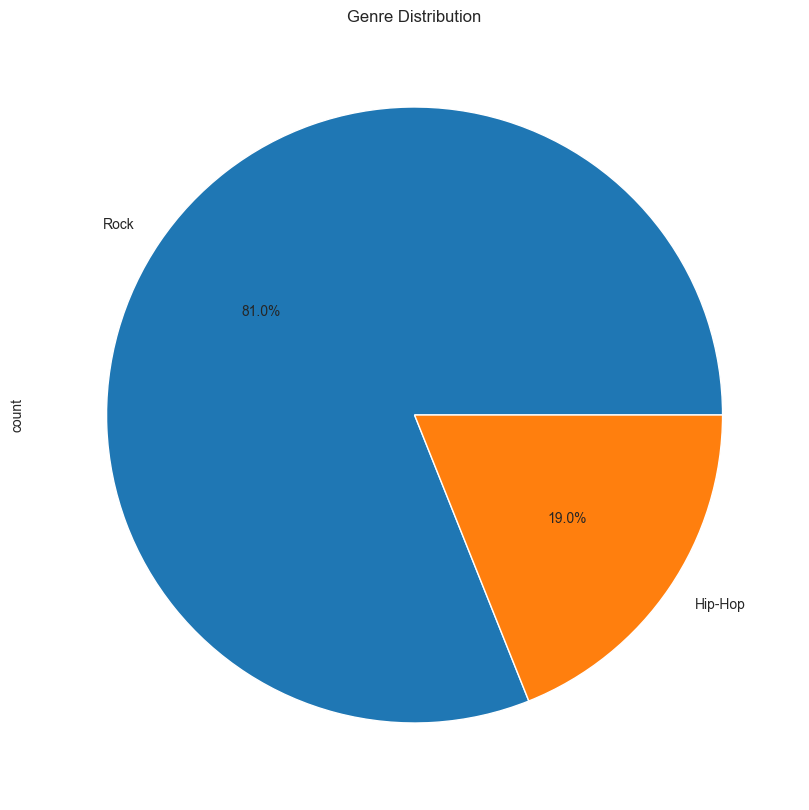

In [274]:
# pie chart of the genre
music_data_clean["genre_top"].value_counts().plot.pie(
    figsize=(10, 10), autopct="%1.1f%%"
)
plt.title("Genre Distribution")

##### Duration


Text(0.5, 1.0, 'Duration of Songs')

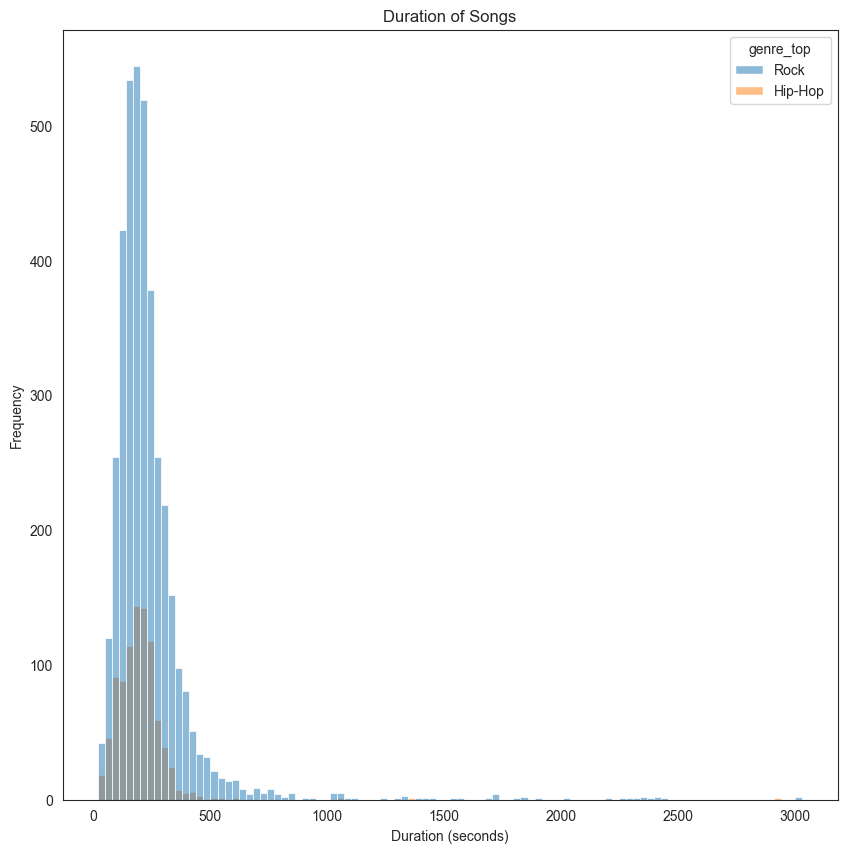

In [275]:
# music_data_clean.hist(figsize=(10, 10), bins=100, column="duration")
# plt.xlabel("Duration (seconds)")
# plt.ylabel("Frequency")
# plt.title("Duration of Songs")
# plt.show()


plt.figure(figsize=(10, 10))
sns.histplot(data=music_data_clean, x="duration", bins=100, hue="genre_top", fill=True)
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.title("Duration of Songs")

##### Interest


Text(0.5, 1.0, 'Interest of Songs')

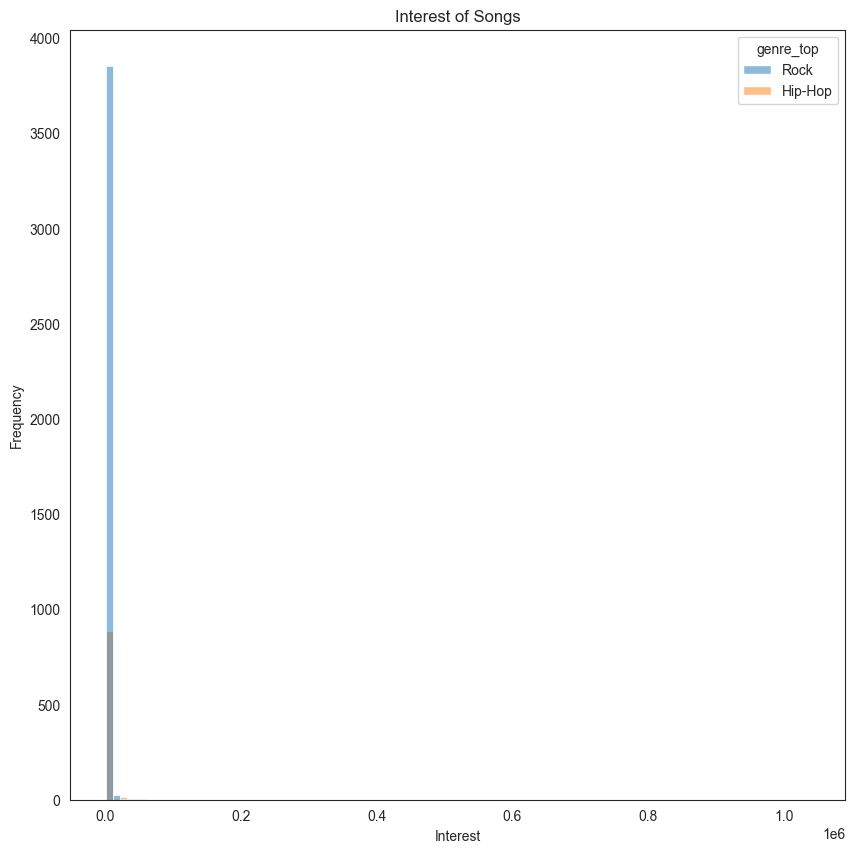

In [276]:
plt.figure(figsize=(10, 10))
sns.histplot(data=music_data_clean, x="interest", bins=100, hue="genre_top", fill=True)
plt.xlabel("Interest")
plt.ylabel("Frequency")
plt.title("Interest of Songs")

##### Listens


Text(0.5, 1.0, 'Listens of Songs')

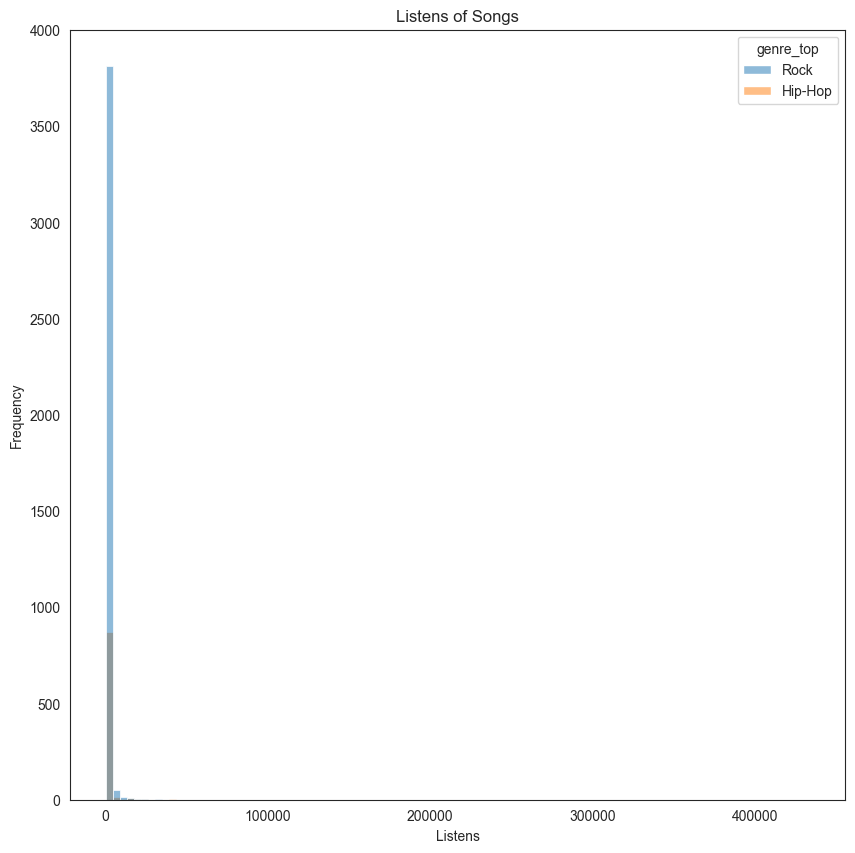

In [277]:
plt.figure(figsize=(10, 10))
sns.histplot(data=music_data_clean, x="listens", bins=100, hue="genre_top", fill=True)
plt.xlabel("Listens")
plt.ylabel("Frequency")
plt.title("Listens of Songs")

##### Acousticness


Text(0.5, 1.0, 'Acousticness of Songs')

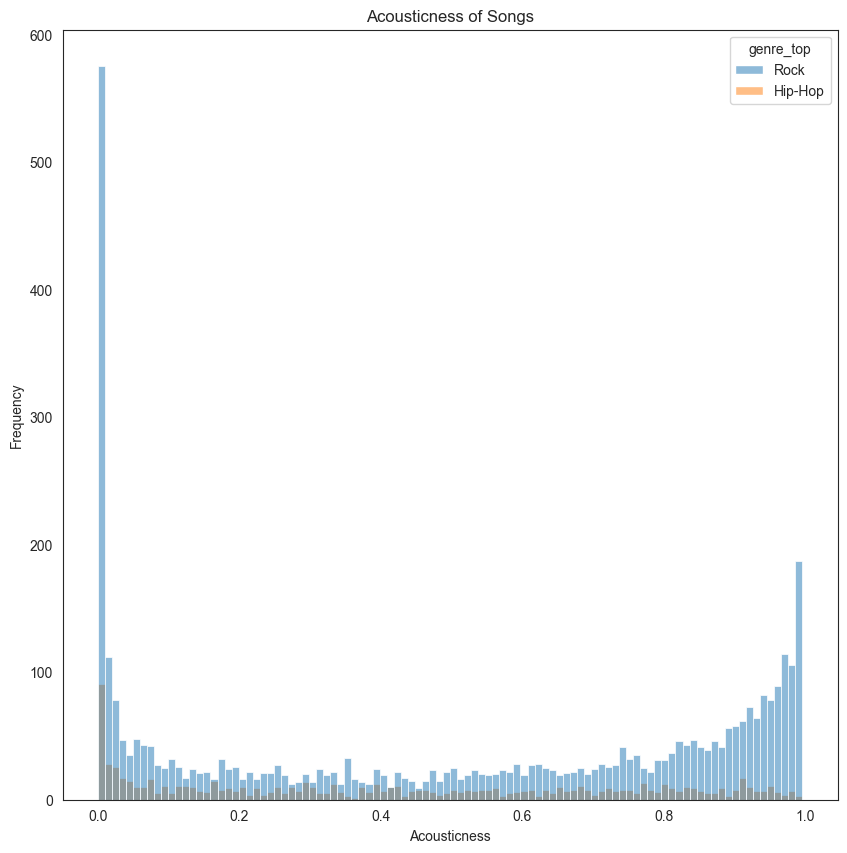

In [278]:
plt.figure(figsize=(10, 10))
sns.histplot(
    data=music_data_clean, x="acousticness", bins=100, hue="genre_top", fill=True
)
plt.xlabel("Acousticness")
plt.ylabel("Frequency")
plt.title("Acousticness of Songs")

##### Danceability


Text(0.5, 1.0, 'Danceability of Songs')

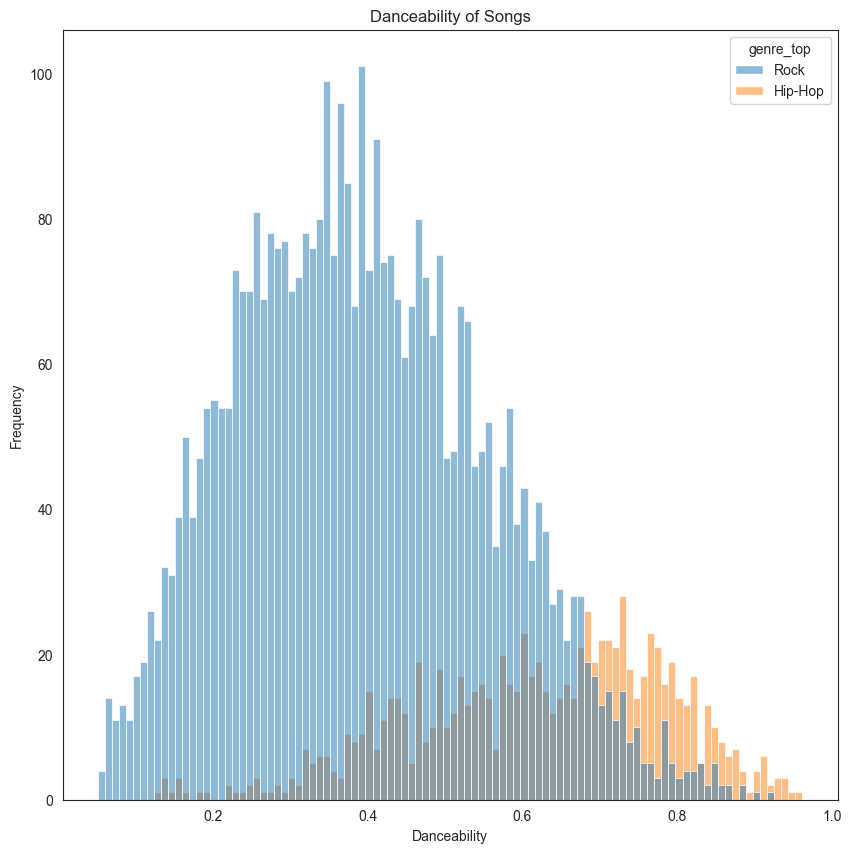

In [279]:
plt.figure(figsize=(10, 10))
sns.histplot(
    data=music_data_clean, x="danceability", bins=100, hue="genre_top", fill=True
)
plt.xlabel("Danceability")
plt.ylabel("Frequency")
plt.title("Danceability of Songs")

##### Energy


Text(0.5, 1.0, 'Energy of Songs')

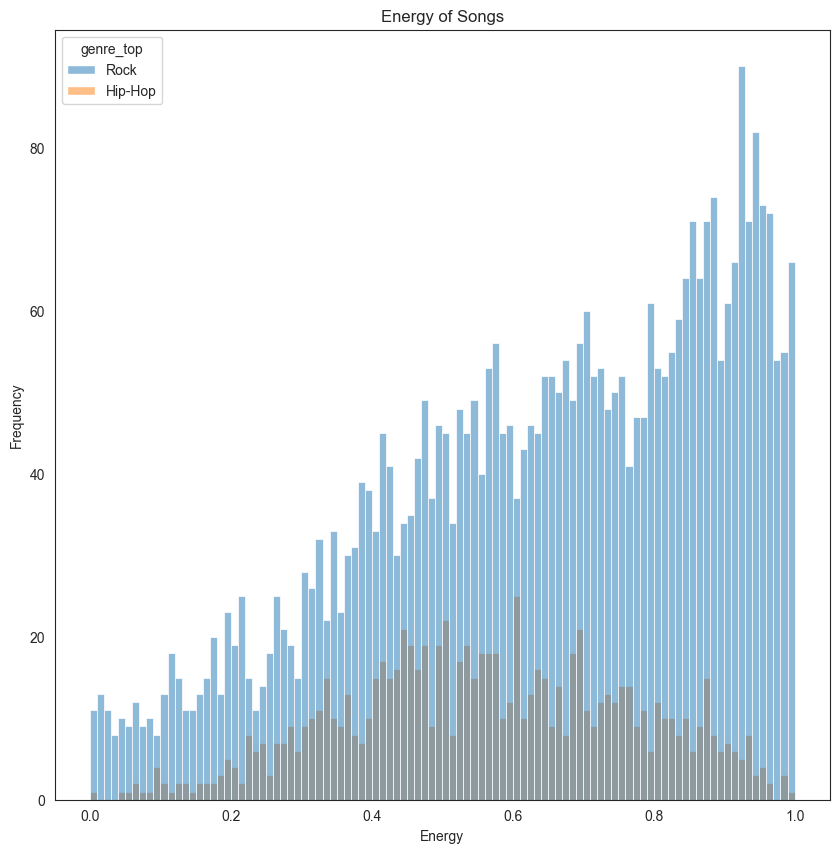

In [280]:
plt.figure(figsize=(10, 10))
sns.histplot(data=music_data_clean, x="energy", bins=100, hue="genre_top", fill=True)
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.title("Energy of Songs")

##### Instrumentalness


Text(0.5, 1.0, 'Instrumentalness of Songs')

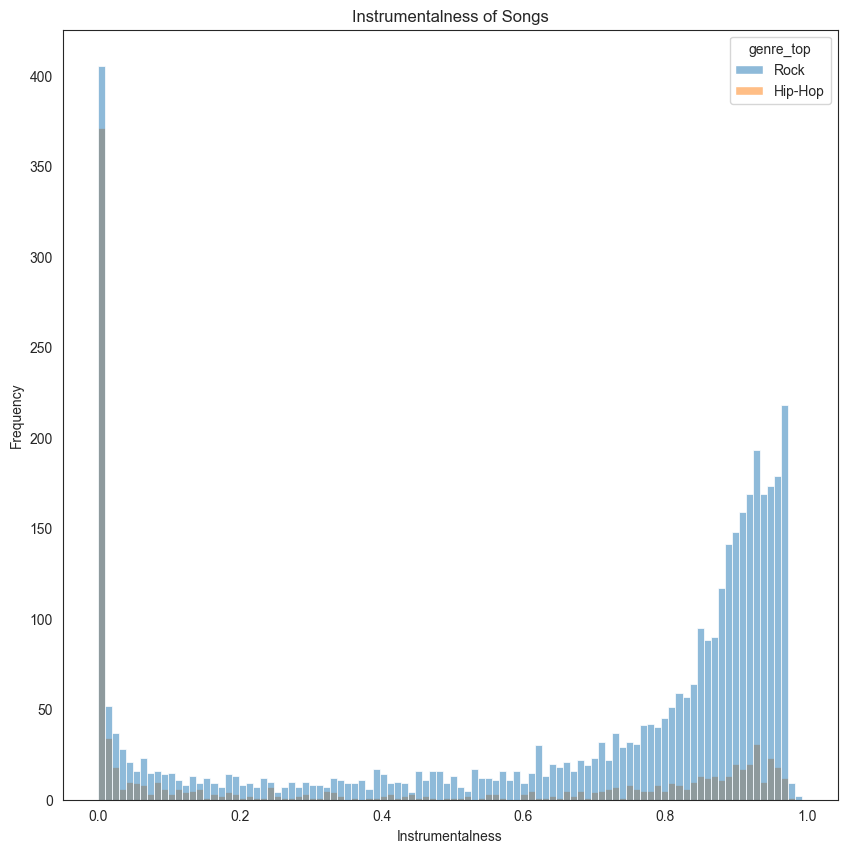

In [281]:
plt.figure(figsize=(10, 10))
sns.histplot(data=music_data_clean, x="instrumentalness", bins=100, hue="genre_top")
plt.xlabel("Instrumentalness")
plt.ylabel("Frequency")
plt.title("Instrumentalness of Songs")

##### Liveness


Text(0.5, 1.0, 'Liveness of Songs')

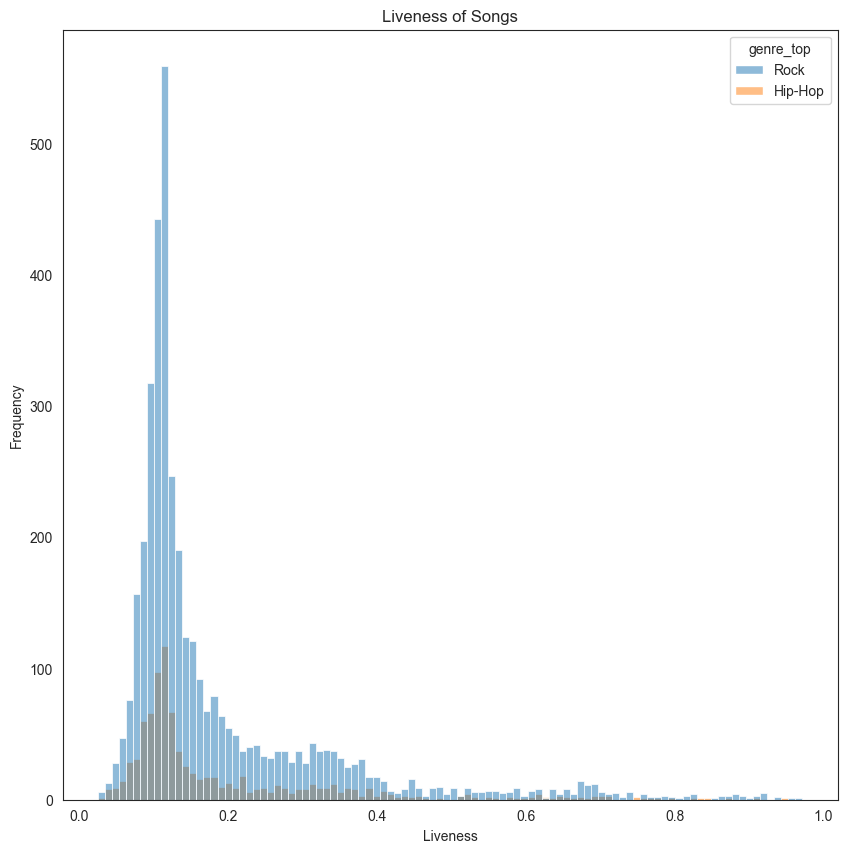

In [282]:
plt.figure(figsize=(10, 10))
sns.histplot(data=music_data_clean, x="liveness", bins=100, hue="genre_top", fill=True)
plt.xlabel("Liveness")
plt.ylabel("Frequency")
plt.title("Liveness of Songs")

##### Speachiness


Text(0.5, 1.0, 'Speechiness of Songs')

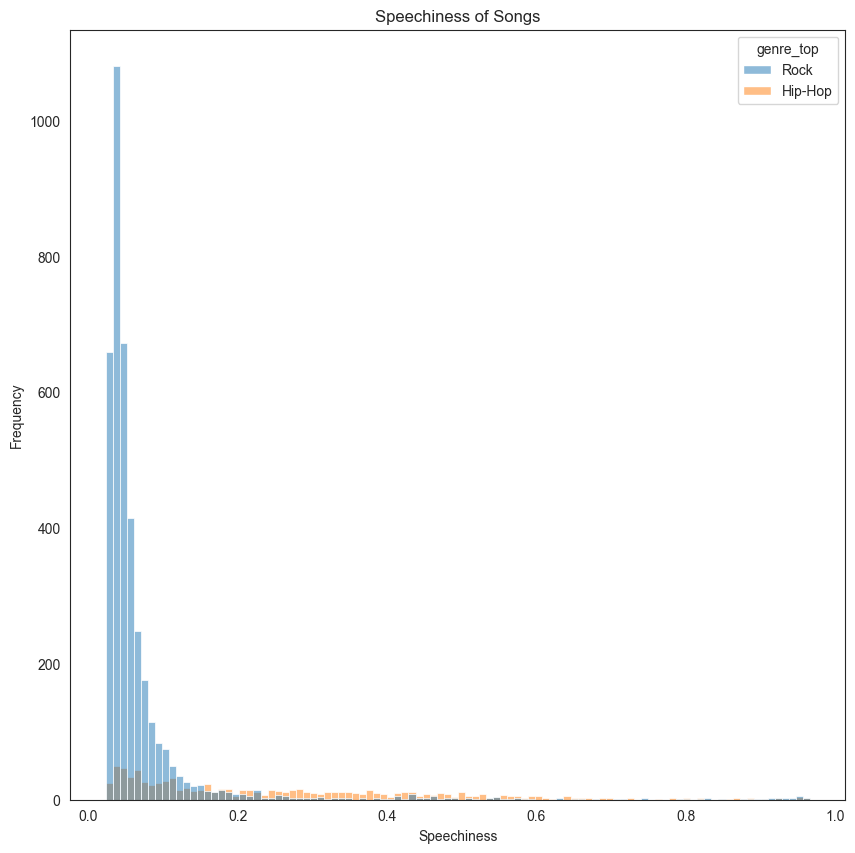

In [283]:
plt.figure(figsize=(10, 10))
sns.histplot(
    data=music_data_clean, x="speechiness", bins=100, hue="genre_top", fill=True
)
plt.xlabel("Speechiness")
plt.ylabel("Frequency")
plt.title("Speechiness of Songs")

##### Tempo


Text(0.5, 1.0, 'Tempo of Songs')

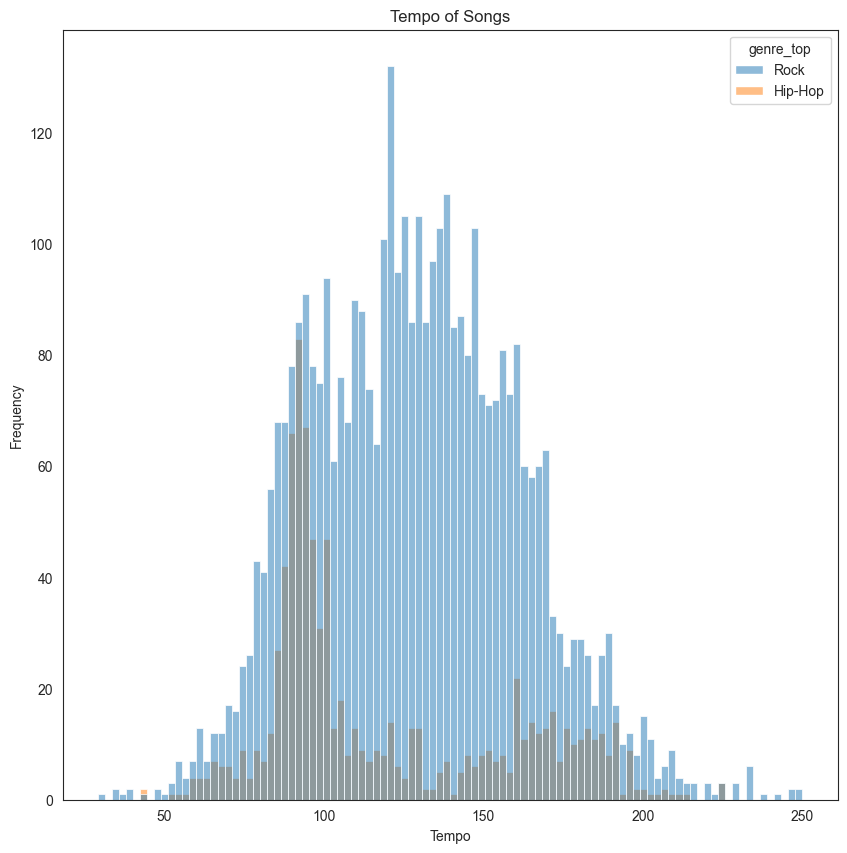

In [284]:
plt.figure(figsize=(10, 10))
sns.histplot(data=music_data_clean, x="tempo", bins=100, hue="genre_top", fill=True)
plt.xlabel("Tempo")
plt.ylabel("Frequency")
plt.title("Tempo of Songs")

##### Valence


Text(0.5, 1.0, 'Valence of Songs')

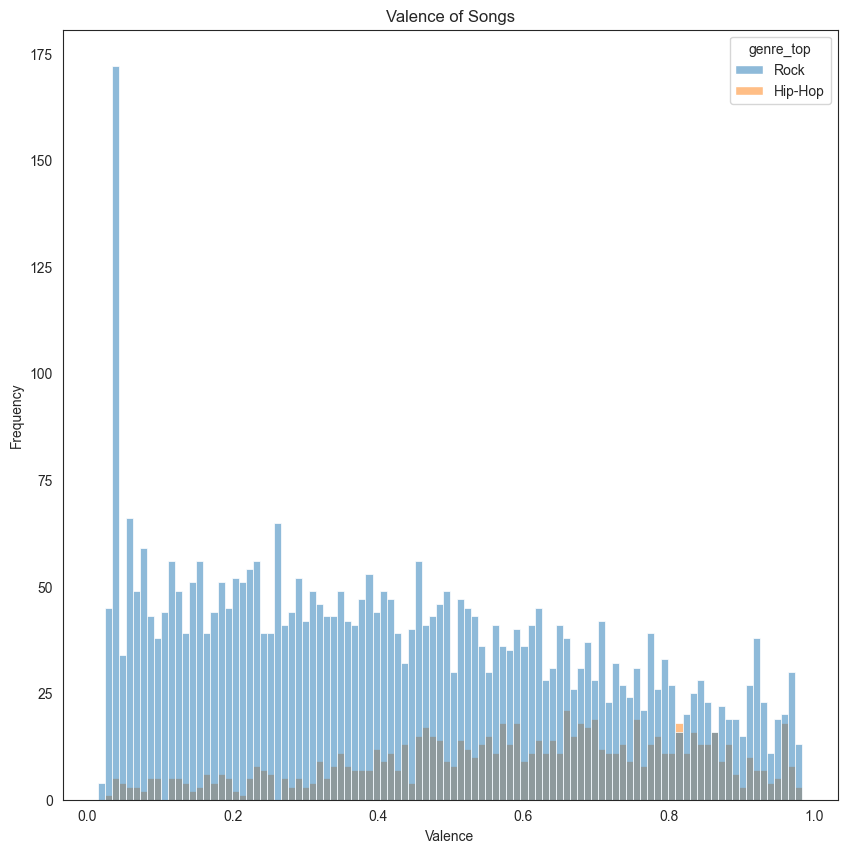

In [285]:
plt.figure(figsize=(10, 10))
sns.histplot(data=music_data_clean, x="valence", bins=100, hue="genre_top", fill=True)
plt.xlabel("Valence")
plt.ylabel("Frequency")
plt.title("Valence of Songs")

#### Bivariate Analysis


##### Scatterplots


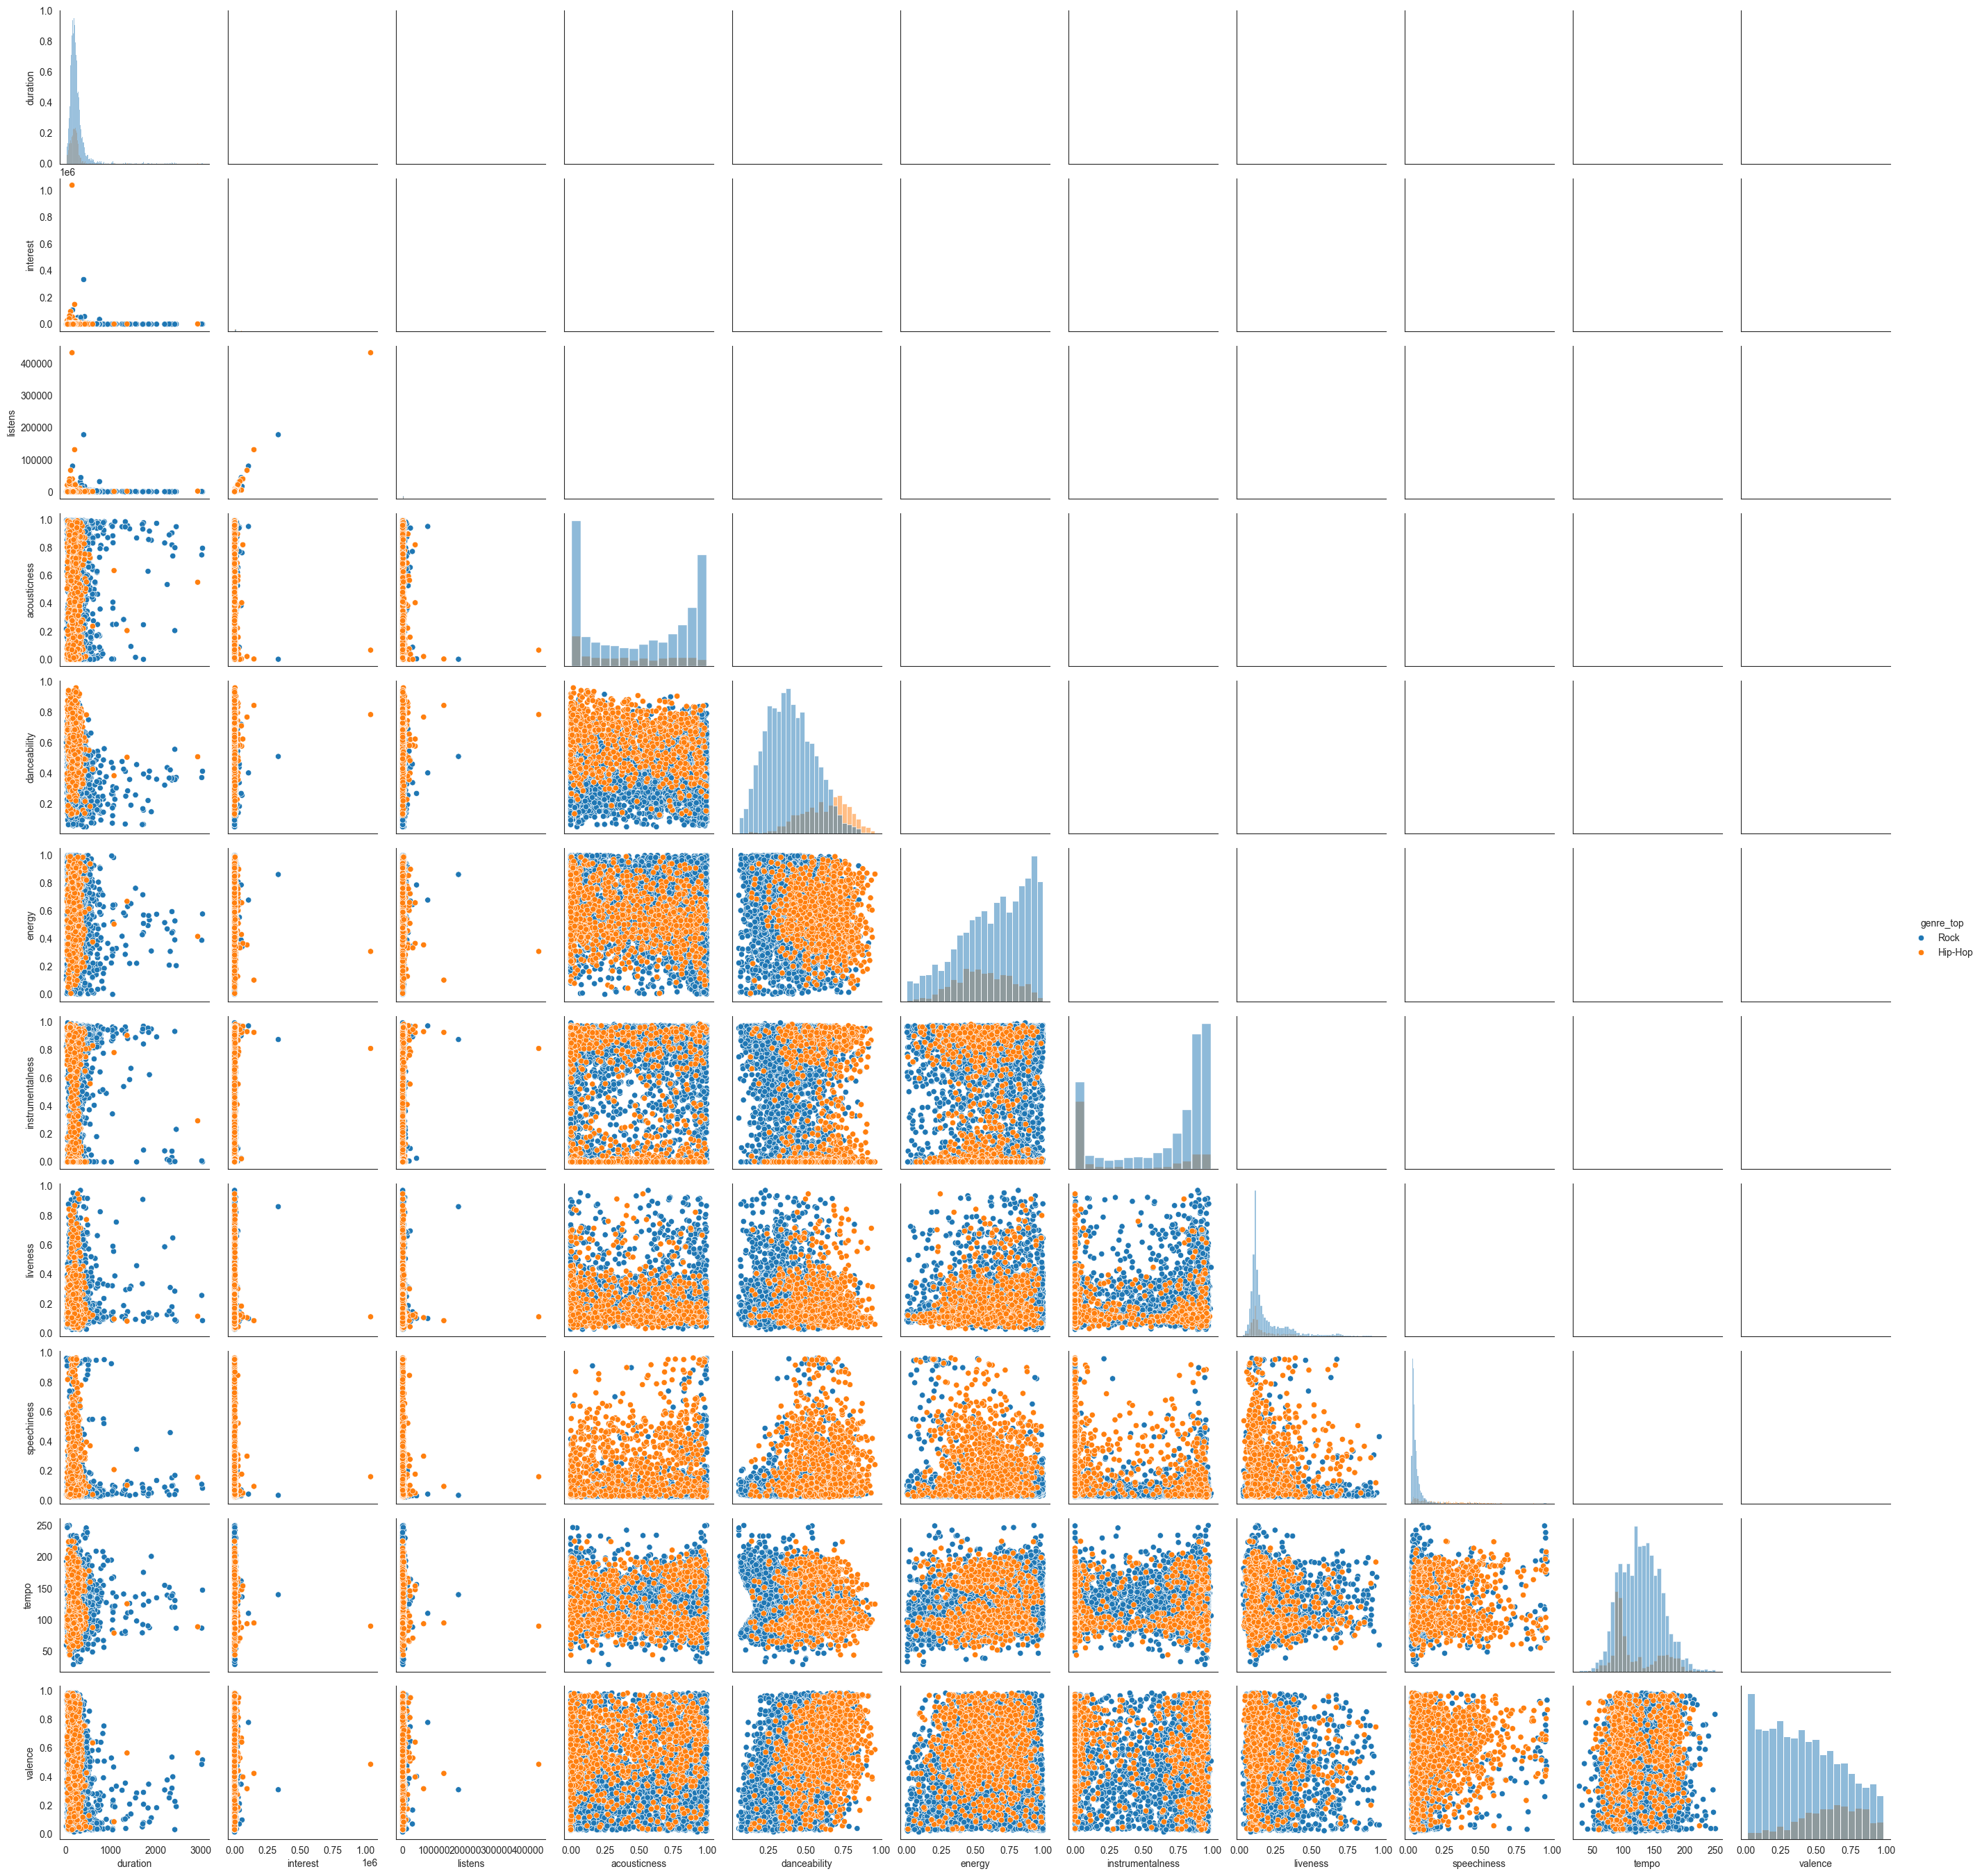

In [286]:
# sns.set_style("white")
# sns.set_palette("Set2")

g = sns.PairGrid(
    data=music_data_clean, diag_sharey=False, corner=False, hue="genre_top"
)

g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

g.add_legend()
plt.show()

##### HeatMap


In [287]:
# extract dataframe with 3 columns from correlation_data

columns = [
    "duration",
    "interest",
    "listens",
    "acousticness",
    "danceability",
    "energy",
    "instrumentalness",
    "liveness",
    "speechiness",
    "tempo",
    "valence",
]

In [288]:
# sns.pairplot(correlation_data[columns])

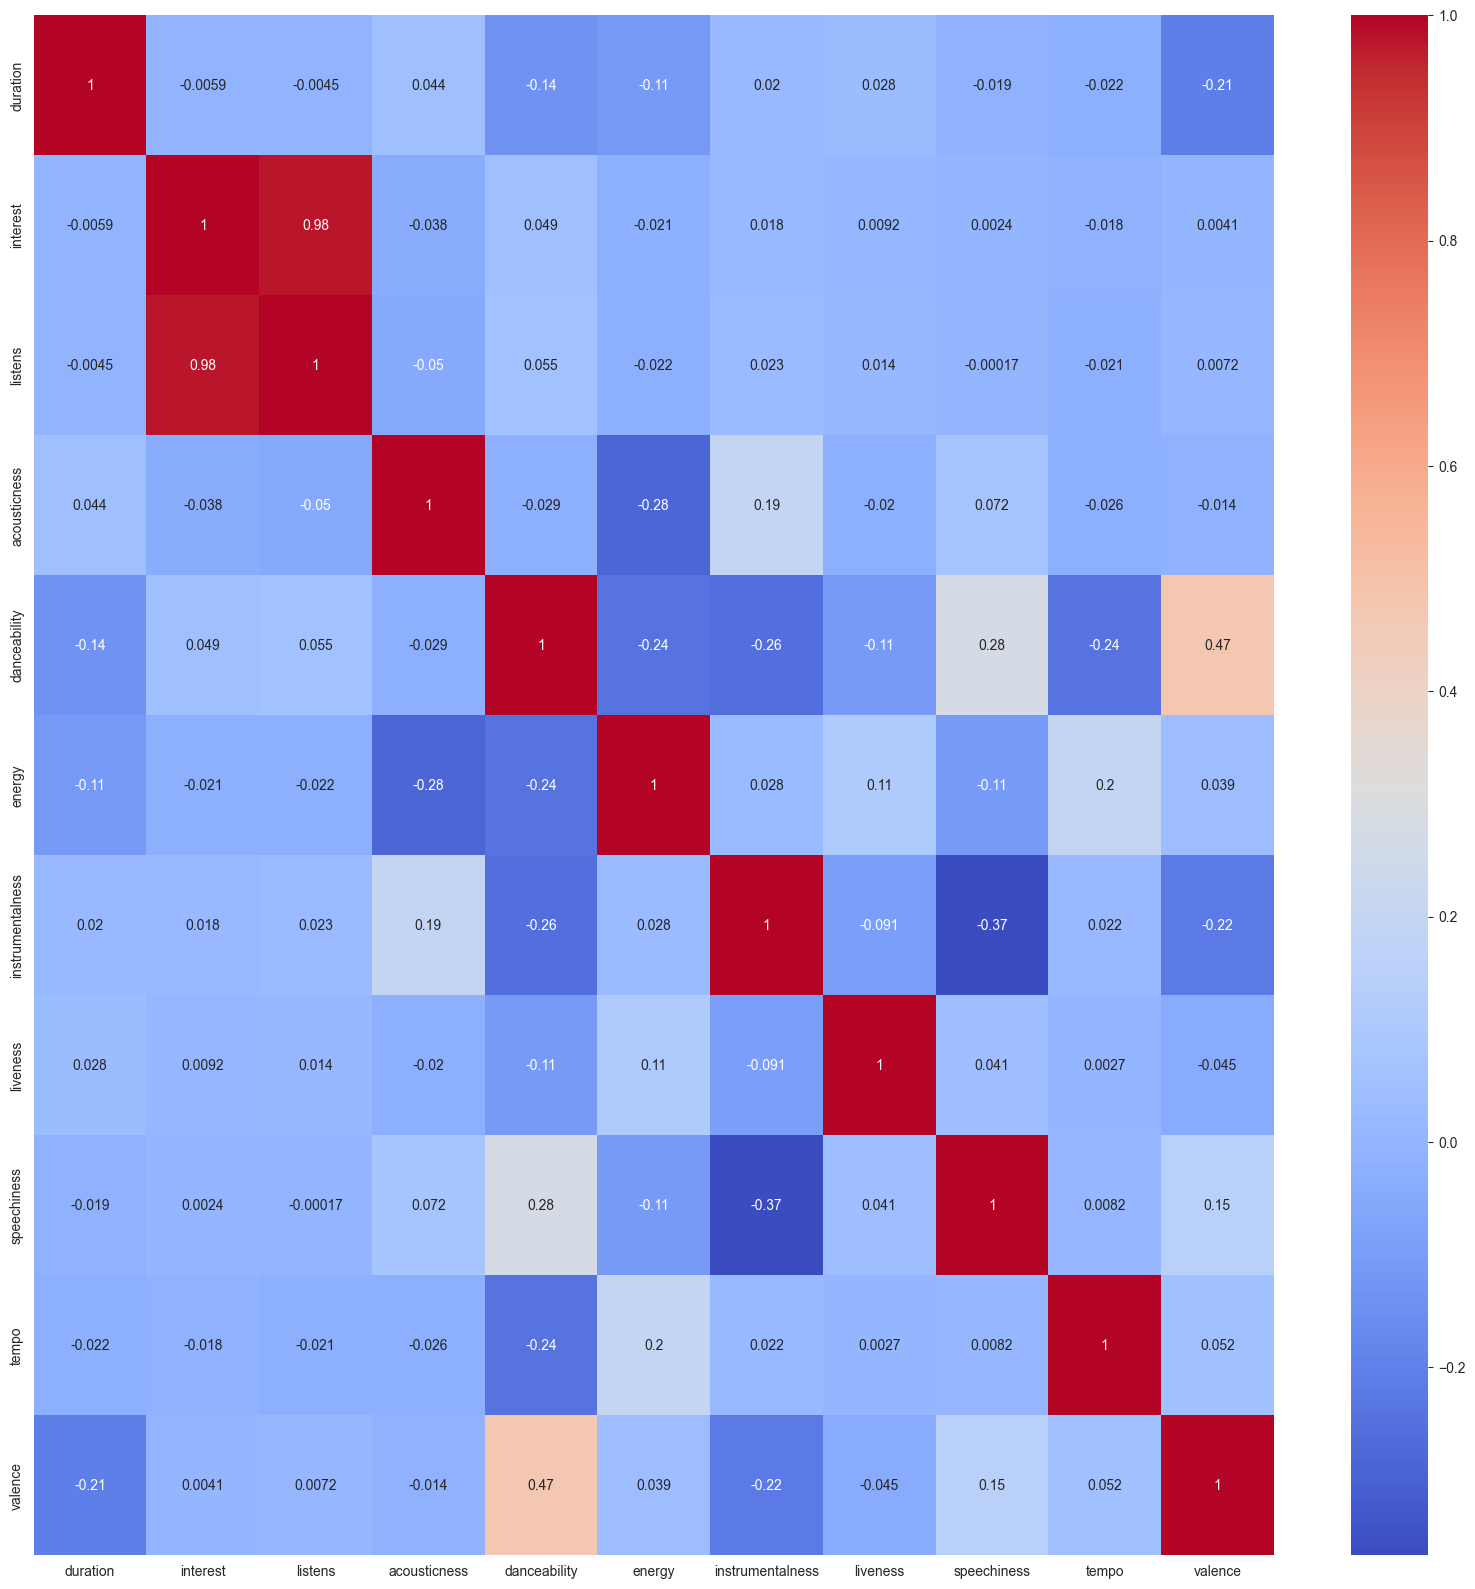

In [289]:
plt.figure(figsize=(20, 20))
sns.heatmap(music_data_clean[columns].corr(), annot=True, cmap="coolwarm")
plt.show()

As it is clearly shown in the above heatmap, there is an extremely high correlation between `interest` and `listens`, which means that they are almost identical. This is not benefitial, so we may drop one of them.


In [290]:
music_data_clean.drop("interest", axis=1, inplace=True)
columns.remove("interest")

In [291]:
music_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   object 
 1   duration          4802 non-null   int64  
 2   genre_top         4802 non-null   object 
 3   listens           4802 non-null   int64  
 4   tags              4802 non-null   object 
 5   title             4802 non-null   object 
 6   acousticness      4802 non-null   float64
 7   danceability      4802 non-null   float64
 8   energy            4802 non-null   float64
 9   instrumentalness  4802 non-null   float64
 10  liveness          4802 non-null   float64
 11  speechiness       4802 non-null   float64
 12  tempo             4802 non-null   float64
 13  valence           4802 non-null   float64
dtypes: float64(8), int64(2), object(4)
memory usage: 525.3+ KB


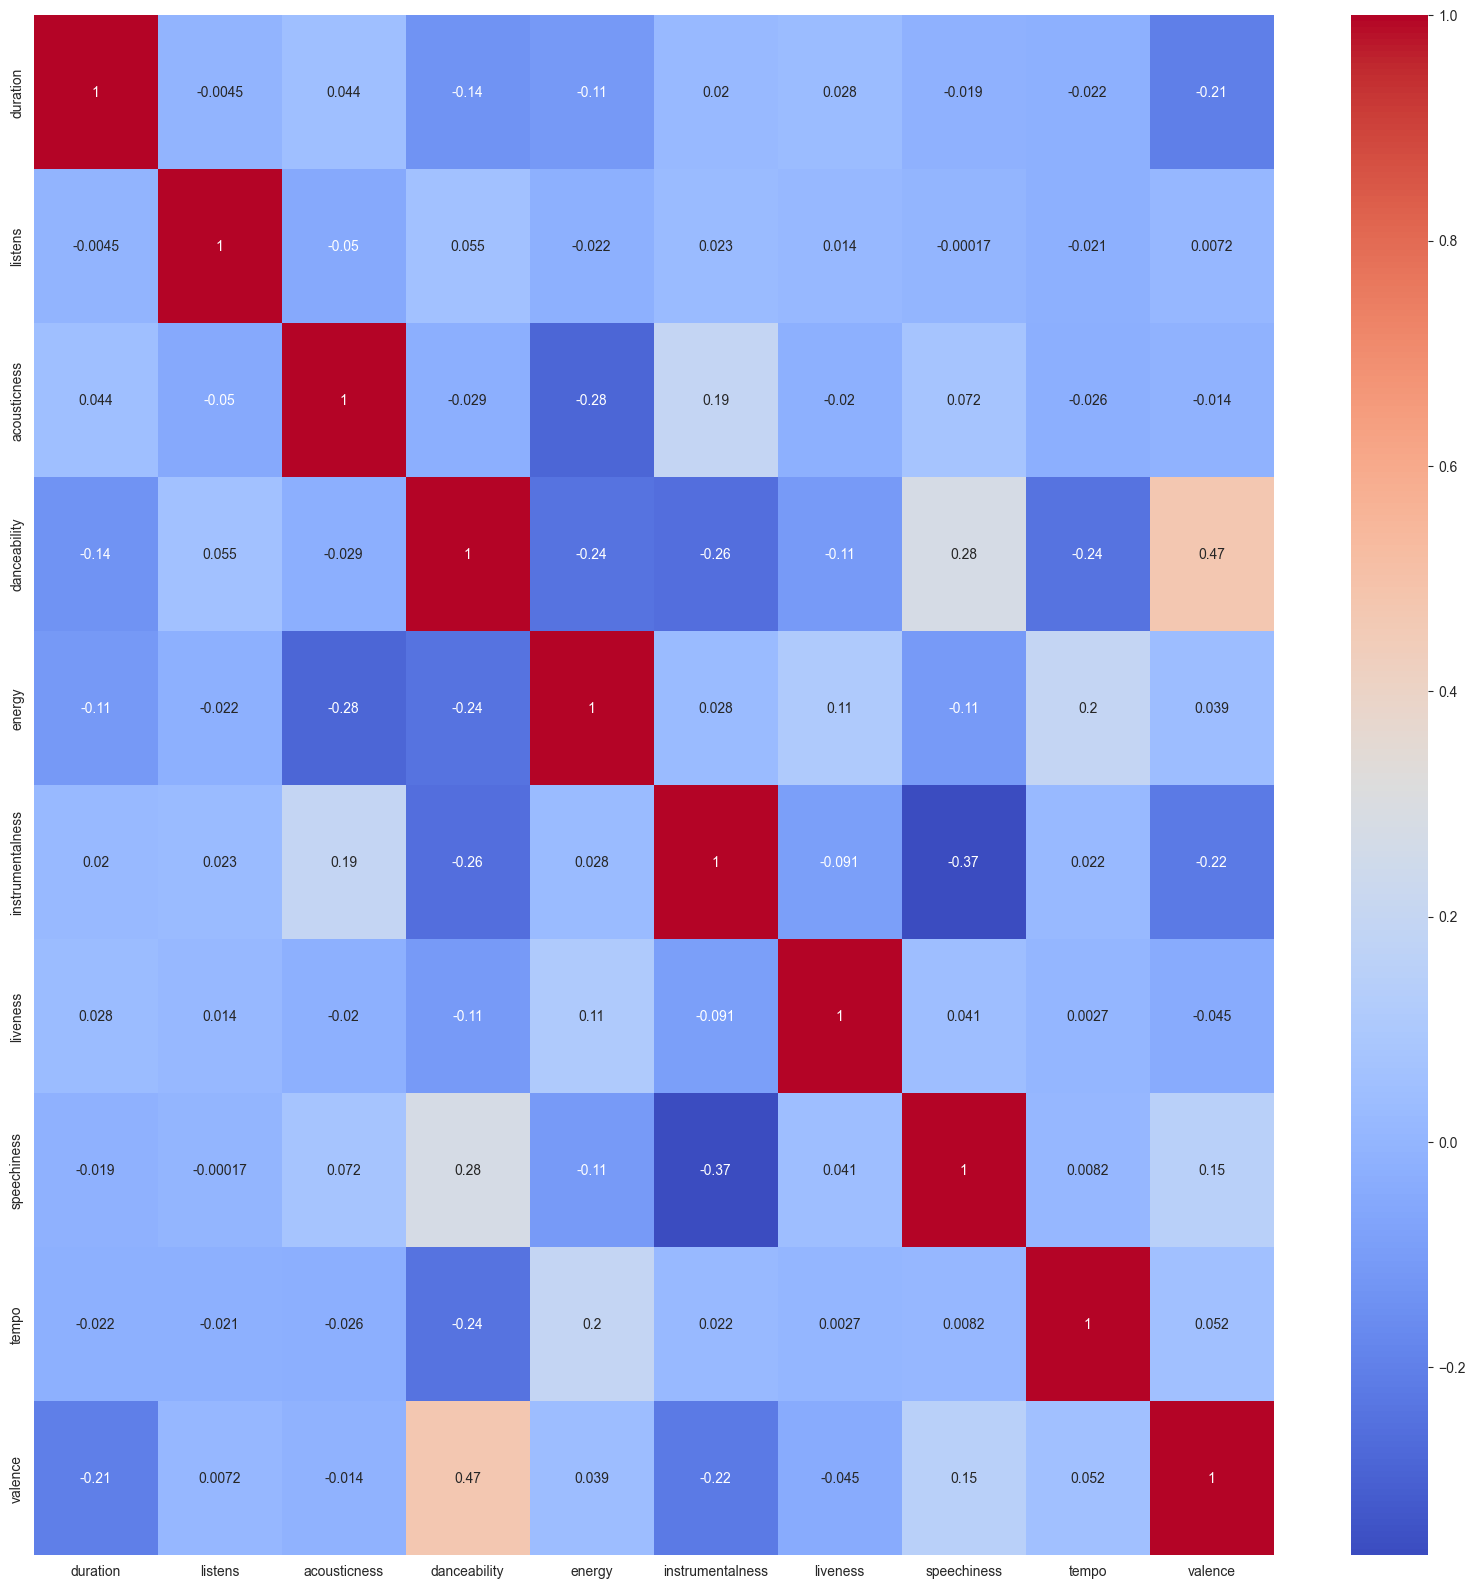

In [292]:
plt.figure(figsize=(20, 20))
sns.heatmap(music_data_clean[columns].corr(), annot=True, cmap="coolwarm")
plt.show()

## Data Cleaning


In [293]:
music_data_clean.duplicated().sum()

0

### Outliers


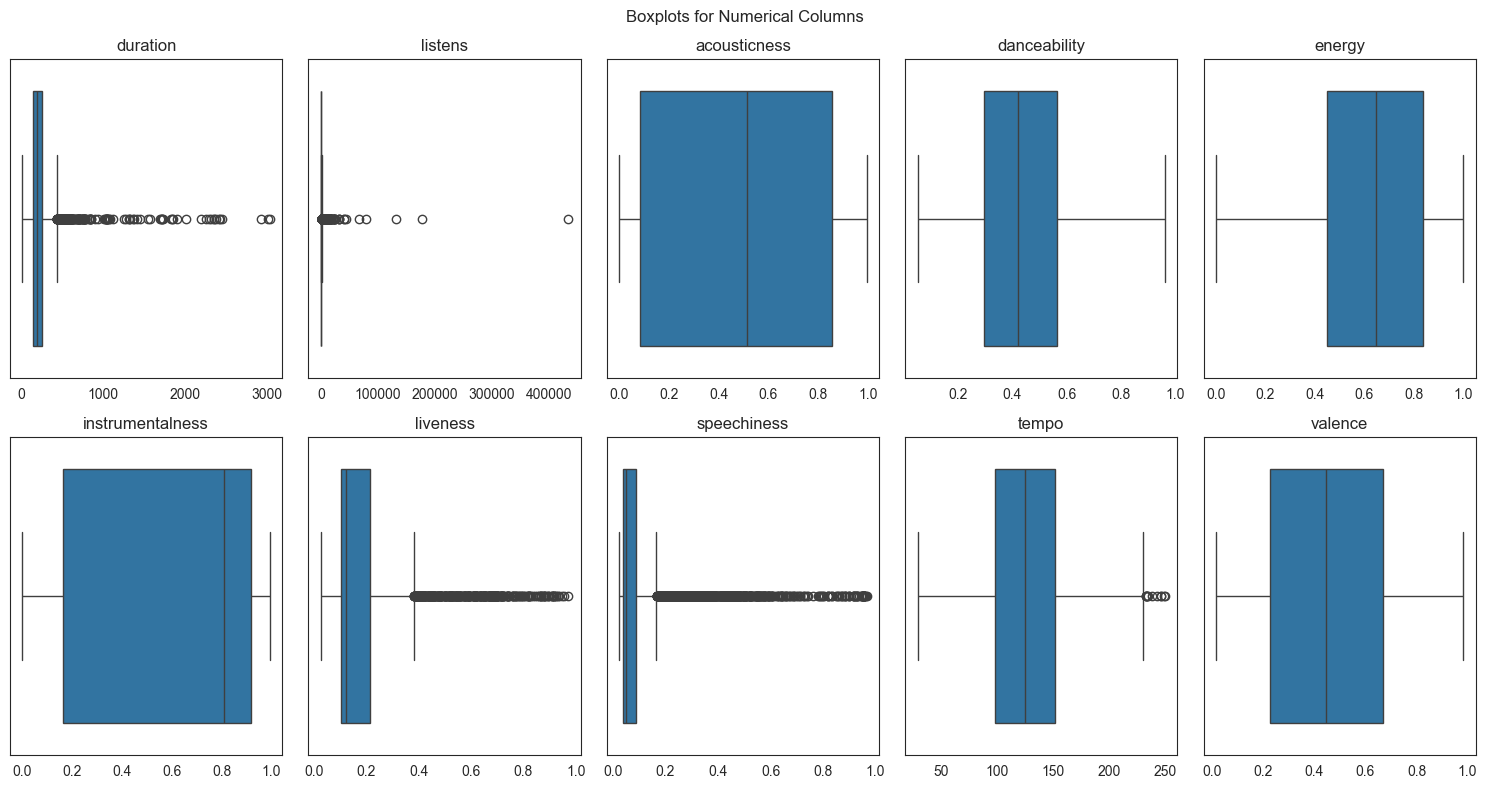

In [294]:
fig, axs = plt.subplots(2, 5, figsize=(15, 8))

# columns = [
#     "duration",
#     "interest",
#     "listens",
#     "acousticness",
#     "danceability",
#     "energy",
#     "instrumentalness",
#     "liveness",
#     "speechiness",
#     "tempo",
#     "valence",
# ]

plt.suptitle("Boxplots for Numerical Columns")

for i, column in enumerate(columns):
    sns.boxplot(data=music_data_clean[column], orient="h", ax=axs[i // 5, i % 5])
    axs[i // 5, i % 5].set_title(column)
    axs[i // 5, i % 5].set_xlabel("")

plt.tight_layout()

plt.show()

### Energy


**_Question:_** Which songs have the highest and lowest levels of energy?


In [295]:
music_data_clean["energy"].describe()

count    4802.000000
mean        0.625126
std         0.244051
min         0.000279
25%         0.450757
50%         0.648374
75%         0.837016
max         0.999768
Name: energy, dtype: float64

In [296]:
print(f"Highest energy level: {np.max(music_data_clean['energy'])}")
print(f"Lowest energy level: {np.min(music_data_clean['energy'])}")

Highest energy level: 0.999767599
Lowest energy level: 0.000278548


Now, we want to determine the genre of both songs.


In [297]:
music_data.loc[music_data_clean["energy"].argmax()]["genre_top"]

'Rock'

In [298]:
music_data.loc[music_data_clean["energy"].argmin()]["genre_top"]

'Rock'

Both the highest and lowest energy songs are Rock songs.


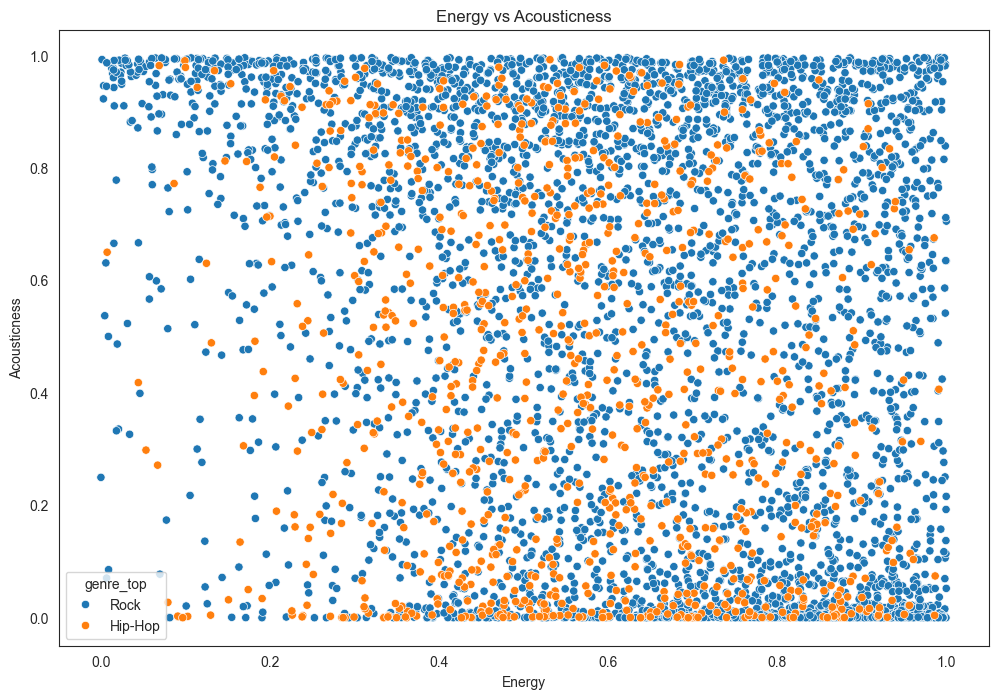

In [299]:
# scatterplot showing the relationship between energy and acousticness

plt.figure(figsize=(12, 8))
# sns.barplot(x="energy", y="acousticness", hue="genre_top", data=music_data)
sns.scatterplot(x="energy", y="acousticness", hue="genre_top", data=music_data_clean)
plt.title("Energy vs Acousticness")
plt.xlabel("Energy")
plt.ylabel("Acousticness")
plt.show()

# Second submission


In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import

On this second submission, we will use new data files, which we will combine with the previous ones in order to have more data.

New data files:

- `df_csv2`


In [301]:
df_csv = pd.read_csv("../data/fma-rock-vs-hiphop.csv")
df_json = pd.read_json("../data/echonest-metrics.json", precise_float=True)

In [302]:
df_csv2 = pd.read_csv("../data/tcc_ceds_music.csv")

### CSV File (New Data)

On the other hand, `tcc_ceds_music.csv` file contains song metadata for 28,372 songs across 31 variables.


In [303]:
df_csv2 = df_csv2[(df_csv2["genre"] == "rock") | (df_csv2["genre"] == "hip hop")]

In [304]:
df_csv2["genre"] = df_csv2["genre"].replace({"rock": "Rock", "hip hop": "Hip-Hop"})

In [305]:
df_csv2.head()

Unnamed: 0              artist_name                      track_name  \
23434       70345              ronnie self                        big fool   
23435       70347              ronnie self                      bop-a-lena   
23436       70351            frankie laine      i heard the angels singing   
23437       70352            frankie laine  i feel like my time ain't long   
23438       70354  bill haley & his comets                    jamaica d.j.   

       release_date genre                                             lyrics  \
23434          1955  Rock  fool fool tell love walk fool fool drivin craz...   
23435          1955  Rock  gogalgo bopalena bopalena bopalena bopalena ye...   
23436          1956  Rock  hear angels sing come sing come sing come hear...   
23437          1956  Rock  bridge look idols think niggas gods right hand...   
23438          1956  Rock  montego work work bother like kind work call s...   

       len    dating  violence  world/life  ...   sadness  feelings  \
23434   54  0.059256  0.000993    0.000993  ...  0.397962  0.000993   
23435   60  0.001949  0.001949    0.001949  ...  0.001949  0.001949   
23436  123  0.301732  0.000532    0.000532  ...  0.000532  0.000532   
23437  199  0.000516  0.073149    0.049564  ...  0.088416  0.000516   
23438   65  0.001032  0.001032    0.001032  ...  0.001032  0.001032   

       danceability  loudness  acousticness  instrumentalness   valence  \
23434      0.666414  0.756865      0.764056          0.000007  0.956719   
23435      0.587350  0.852934      0.604417          0.006346  0.968054   
23436      0.650168  0.648078      0.758032          0.000000  0.930956   
23437      0.596014  0.632413      0.759036          0.000000  0.739283   
23438      0.745478  0.690280      0.712851          0.000004  0.863974   

         energy    topic       age  
23434  0.720712  sadness  0.928571  
23435  0.941940  obscene  0.928571  
23436  0.508493    music  0.914286  
23437  0.460444  obscene  0.914286  
23438  0.833829    music  0.914286  

[5 rows x 31 columns]

We create a column name 'track_id' so that we can merge them later with the other files.


In [306]:
df_csv2["track_id"] = df_csv2.index
df_csv2.shape

(4938, 32)

### Data information


In [307]:
df_csv2.shape

(4938, 32)

In [308]:
df_csv2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4938 entries, 23434 to 28371
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                4938 non-null   int64  
 1   artist_name               4938 non-null   object 
 2   track_name                4938 non-null   object 
 3   release_date              4938 non-null   int64  
 4   genre                     4938 non-null   object 
 5   lyrics                    4938 non-null   object 
 6   len                       4938 non-null   int64  
 7   dating                    4938 non-null   float64
 8   violence                  4938 non-null   float64
 9   world/life                4938 non-null   float64
 10  night/time                4938 non-null   float64
 11  shake the audience        4938 non-null   float64
 12  family/gospel             4938 non-null   float64
 13  romantic                  4938 non-null   float64
 14  communic

## DataFrame Combination

As an initial preventive measure, we will be performing a test to find how many common track_id values are found along three DataFrames.

This number will be used as reference for how many rows the combined table should have.


In [309]:
count = 0

for id in df_json.track_id:
    if id in df_csv.track_id.values:
        count += 1
    if id in df_csv2.track_id.values:
        count += 1

print(count)

5648


### Concat

Now will concat vertically() the datafiles.


In [310]:
column_mapping = {
    "track_name": "title",
    "artist_name": "composer",
    "genre": "genre_top",
}

df_csv2 = df_csv2.rename(columns=column_mapping)

In [311]:
df_merge = pd.merge(df_csv, df_json, on="track_id")

df_combined = pd.concat([df_merge, df_csv2])

In [312]:
df_combined.shape

(9740, 52)

Regarding the result provided from the merge() function, they appear to be in line with the previously established requierements, meaning we now have our new complete DataFrame with all song attributes.


In [313]:
new_music_data = df_combined

In [314]:
duplicate_rows = df_combined[df_combined.duplicated(keep=False)]
duplicate_rows

Empty DataFrame
Columns: [track_id, bit_rate, comments, composer, date_created, date_recorded, duration, favorites, genre_top, genres, genres_all, information, interest, language_code, license, listens, lyricist, number, publisher, tags, title, acousticness, danceability, energy, instrumentalness, liveness, speechiness, tempo, valence, Unnamed: 0, release_date, lyrics, len, dating, violence, world/life, night/time, shake the audience, family/gospel, romantic, communication, obscene, music, movement/places, light/visual perceptions, family/spiritual, like/girls, sadness, feelings, loudness, topic, age]
Index: []

[0 rows x 52 columns]

## Data cleaning


### Nan Attributes Removal


In [315]:
new_music_data_original = df_combined.copy()

In [316]:
new_music_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9740 entries, 0 to 28371
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  9740 non-null   int64  
 1   bit_rate                  4802 non-null   float64
 2   comments                  4802 non-null   float64
 3   composer                  5044 non-null   object 
 4   date_created              4802 non-null   object 
 5   date_recorded             1234 non-null   object 
 6   duration                  4802 non-null   float64
 7   favorites                 4802 non-null   float64
 8   genre_top                 9740 non-null   object 
 9   genres                    4802 non-null   object 
 10  genres_all                4802 non-null   object 
 11  information               334 non-null    object 
 12  interest                  4802 non-null   float64
 13  language_code             2599 non-null   object 
 14  license     

In [317]:
new_music_data.isna().sum()

track_id                       0
bit_rate                    4938
comments                    4938
composer                    4696
date_created                4938
date_recorded               8506
duration                    4938
favorites                   4938
genre_top                      0
genres                      4938
genres_all                  4938
information                 9406
interest                    4938
language_code               7141
license                     4951
listens                     4938
lyricist                    9727
number                      4938
publisher                   9713
tags                        4938
title                          0
acousticness                   0
danceability                   0
energy                         0
instrumentalness               0
liveness                    4938
speechiness                 4938
tempo                       4938
valence                        0
Unnamed: 0                  4802
release_da

In [318]:
missing_percentage = (new_music_data.isna().sum() / len(new_music_data)) * 100

missing_percentage = missing_percentage.round(0)

print(missing_percentage)

track_id                      0.0
bit_rate                     51.0
comments                     51.0
composer                     48.0
date_created                 51.0
date_recorded                87.0
duration                     51.0
favorites                    51.0
genre_top                     0.0
genres                       51.0
genres_all                   51.0
information                  97.0
interest                     51.0
language_code                73.0
license                      51.0
listens                      51.0
lyricist                    100.0
number                       51.0
publisher                   100.0
tags                         51.0
title                         0.0
acousticness                  0.0
danceability                  0.0
energy                        0.0
instrumentalness              0.0
liveness                     51.0
speechiness                  51.0
tempo                        51.0
valence                       0.0
Unnamed: 0    

In [319]:
threshold = 48

columns_to_remove = missing_percentage[missing_percentage > threshold].index

new_music_data = new_music_data.drop(columns_to_remove, axis=1)

In [320]:
new_music_data.shape

(9740, 9)

In [321]:
new_music_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9740 entries, 0 to 28371
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          9740 non-null   int64  
 1   composer          5044 non-null   object 
 2   genre_top         9740 non-null   object 
 3   title             9740 non-null   object 
 4   acousticness      9740 non-null   float64
 5   danceability      9740 non-null   float64
 6   energy            9740 non-null   float64
 7   instrumentalness  9740 non-null   float64
 8   valence           9740 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 760.9+ KB


### Irrelevant Attributes Removal

Now, taking into account the definitions provided for every variable, we consider the following attributes to be irrelevant for the intended purpose of this project:

- `Track id`
- `Title`

<!-- - `Interest` -->


In [322]:
columns_to_remove = ["track_id", "title", "composer"]
new_music_data = new_music_data.drop(columns=columns_to_remove)

In [323]:
new_music_data_clean = new_music_data

In [324]:
new_music_data_clean.info

<bound method DataFrame.info of       genre_top  acousticness  danceability    energy  instrumentalness  \
0          Rock      0.988306      0.255661  0.979774          0.973006   
1          Rock      0.970135      0.352946  0.023852          0.957113   
2          Rock      0.981657      0.142249  0.912122          0.967294   
3          Rock      0.989141      0.225978  0.722835          0.263076   
4          Rock      0.886660      0.298518  0.744333          0.920950   
...         ...           ...           ...       ...               ...   
28367   Hip-Hop      0.062549      0.889527  0.695686          0.000000   
28368   Hip-Hop      0.004607      0.662082  0.797791          0.000002   
28369   Hip-Hop      0.104417      0.663165  0.767761          0.000001   
28370   Hip-Hop      0.007027      0.883028  0.885882          0.000503   
28371   Hip-Hop      0.015862      0.828875  0.492477          0.000000   

        valence  
0      0.034018  
1      0.035632  
2      0.0343

# Exploration Data Analysis (EDA)


In [325]:
print(new_music_data_clean.columns)

Index(['genre_top', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'valence'],
      dtype='object')


In [326]:
new_music_data_clean.shape

(9740, 6)

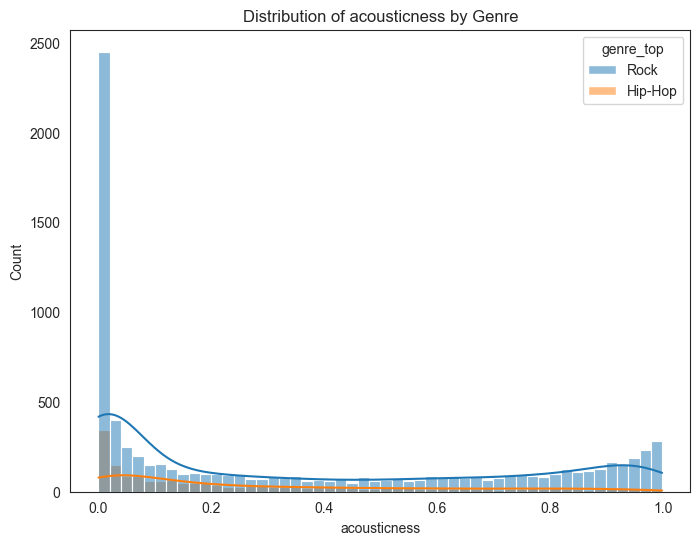

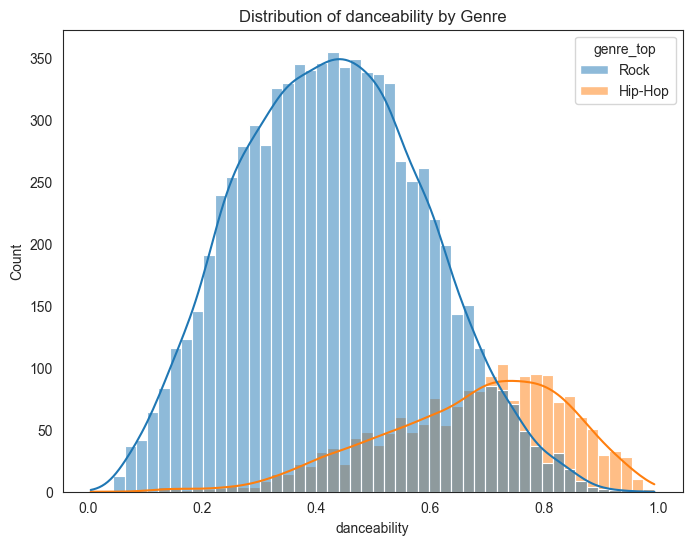

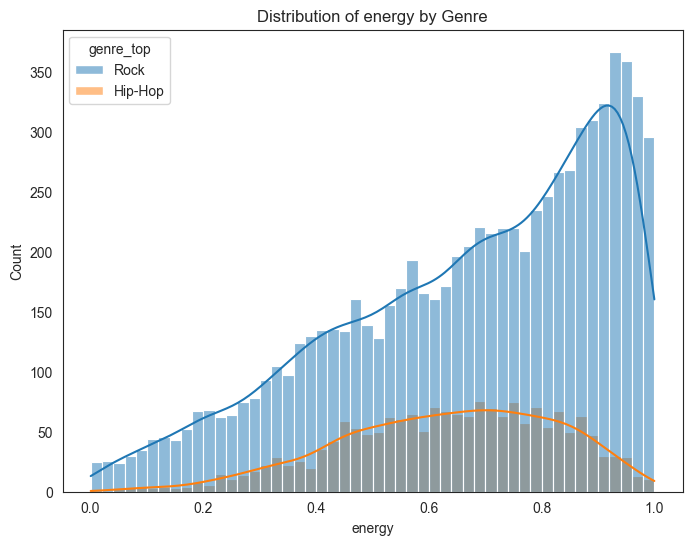

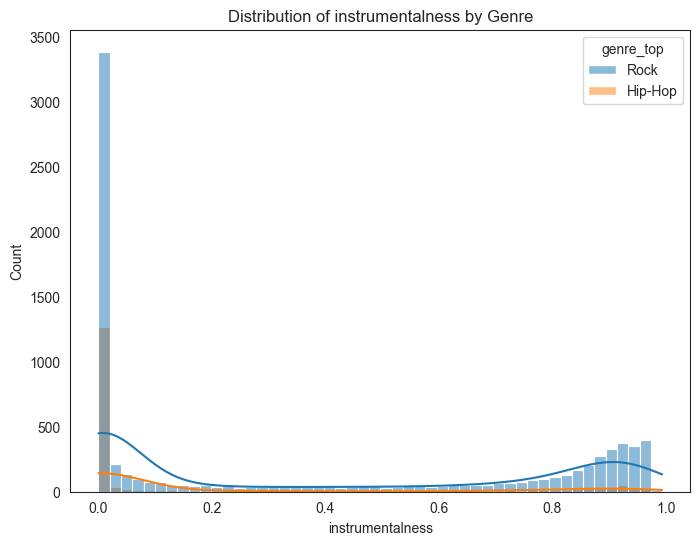

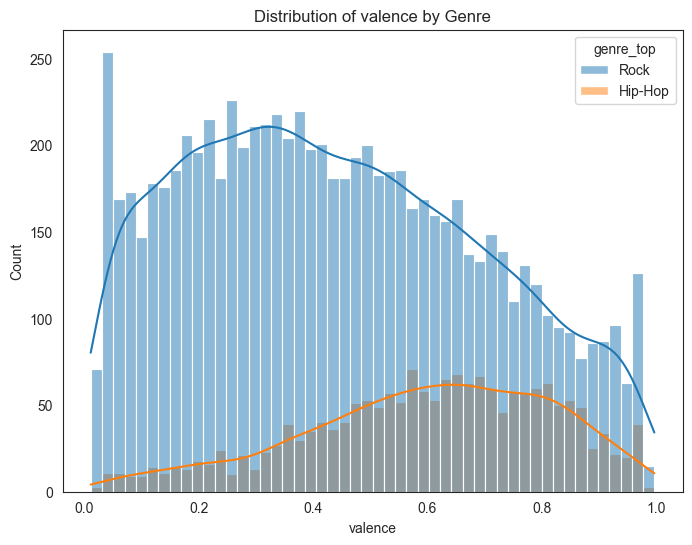

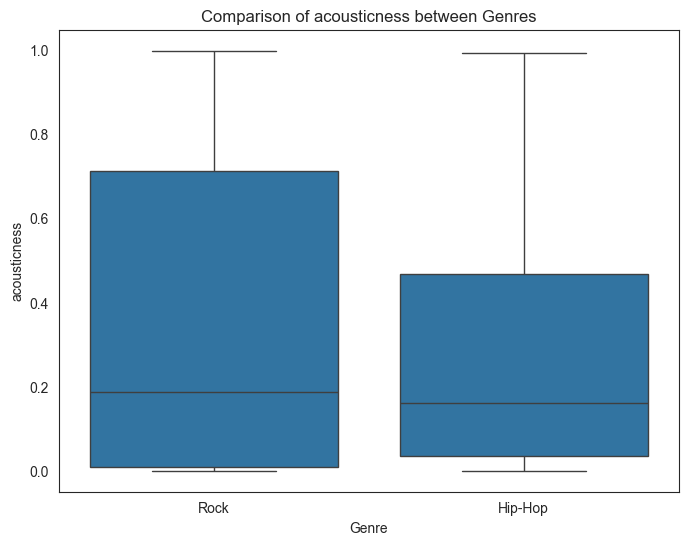

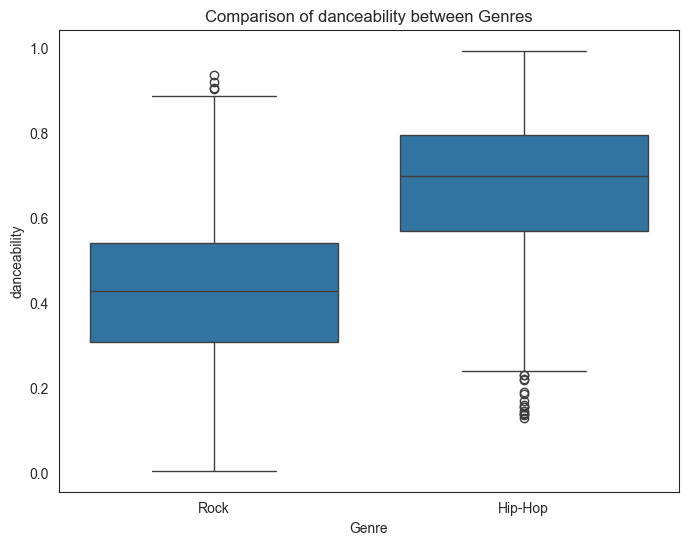

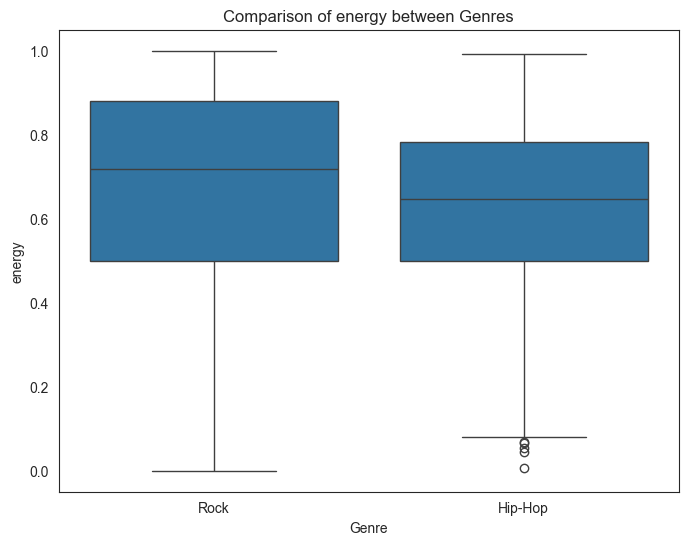

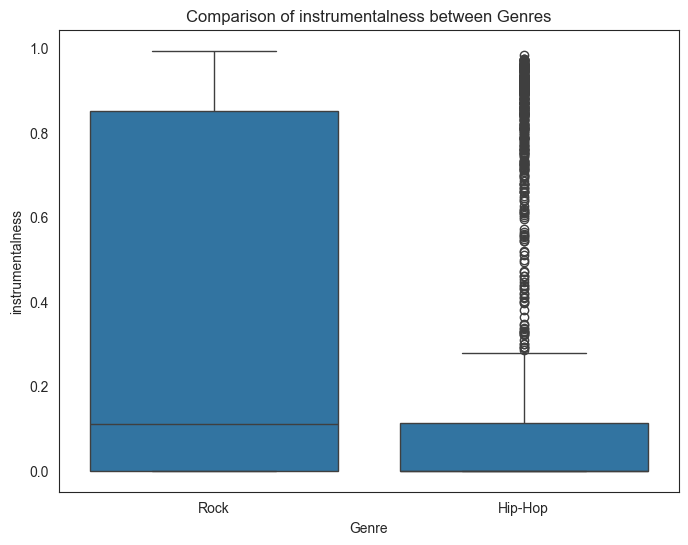

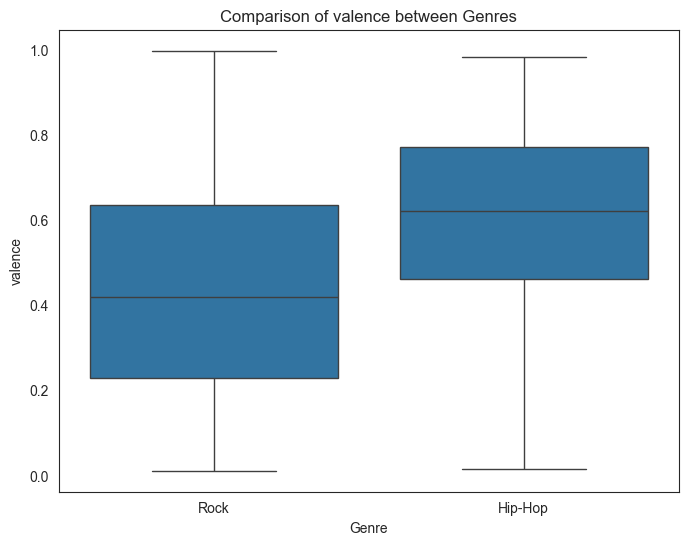

In [327]:
features = ["acousticness", "danceability", "energy", "instrumentalness", "valence"]

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(
        data=new_music_data_clean, x=feature, hue="genre_top", bins=50, kde=True
    )
    plt.title(f"Distribution of {feature} by Genre")
    plt.xlabel(feature)
    plt.show()

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=new_music_data_clean, x="genre_top", y=feature)
    plt.title(f"Comparison of {feature} between Genres")
    plt.xlabel("Genre")
    plt.ylabel(feature)
    plt.show()

# Split dataframe


In [328]:
# Separating the target variable and the attributes
y = new_music_data_clean["genre_top"]
X = new_music_data_clean.drop(["genre_top"], axis=1)

The values we are using are highly imbalanced, which may cause accuracy issues in the models. Therefore, we are going to balance them now.


In [329]:
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.3, random_state=0)

# Data Balancing with SMOTE


In [330]:
# Define SMOTE
sm = SMOTE(random_state=2)

# Fit SMOTE on training data
train_features_res, train_labels_res = sm.fit_resample(train_features, train_labels)

We'll count the number of rows of Rock and hip-hip on the target variable without implementing SMOTE


In [331]:
count_of_genres_unbalanced = train_labels.value_counts()
print(count_of_genres_unbalanced)

genre_top
Rock       5540
Hip-Hop    1278
Name: count, dtype: int64


We'll count the number of rows of Rock and hip-hip on the target variable implementing SMOTE


In [332]:
count_of_genres_balanced = train_labels_res.value_counts()
print(count_of_genres_balanced)

genre_top
Rock       5540
Hip-Hop    5540
Name: count, dtype: int64


### Alghoritsm

In [333]:
# Esta función maximiza el TPR y minimiza el FPR
def umbral_optimo(y_prob,y,ths):
    
    y_prob_c1 = y_prob[:, 1]
    roc = []
    for j in range (len(ths)):
        y_pred = np.zeros(len(y_prob_c1))
        for i in range(len(y_prob_c1)):
            if (y_prob_c1[i] >= ths[j]):
                y_pred[i] = 1
        cm = confusion_matrix(y,y_pred)
        TP = cm[1,1]
        TN = cm[0,0]
        FP = cm[0,1]
        FN = cm[1,0]
        TPR = TP/(TP+FN)
        FPR = FP/(FP+TN)
        roc.append((TPR,FPR,ths[j]))    

    roc = np.array(roc)  
    
    distance_to_top_left_corner = []

    for i in range(len(roc)):
        distance_to_top_left_corner.append( np.sqrt( ((roc[i,1]-0)**2)+((roc[i,0]-1)**2) ) )

    index_of_best_threshold = distance_to_top_left_corner.index(min(distance_to_top_left_corner)) #Retorna el índice con la menor distancia
    best_threshold          = ths[index_of_best_threshold]
    #print('El mejor umbral para el conjunto de validación es {:.4f}.'.format(best_threshold))
    return best_threshold

In [334]:
binary_train_labels = train_labels.replace({"Hip-Hop": 0, "Rock": 1})
binary_train_labels_res = train_labels_res.replace({"Hip-Hop": 0, "Rock": 1})
binary_test_labels = test_labels.replace({"Hip-Hop": 0, "Rock": 1})

# Unbalanced


## Scaling


In [335]:
## Scaling
# Scale the features and store the values in a new variable
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.transform(test_features)

## PCA


Text(0, 0.5, 'cumulative explained variance')

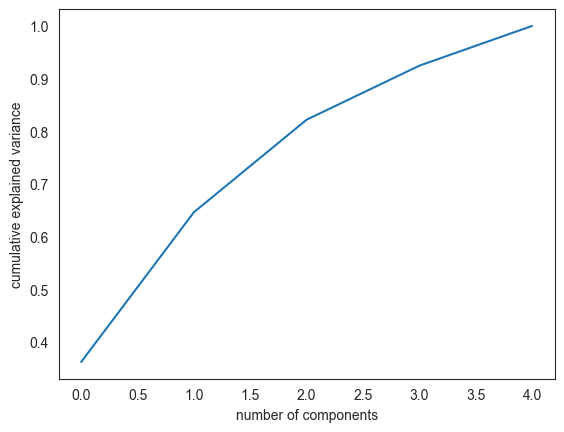

In [336]:
pca = PCA().fit(scaled_train_features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [337]:
pca = PCA(n_components=3) # change the n_components to your desired number
train_features_pca = pca.fit_transform(scaled_train_features)
test_features_pca = pca.transform(scaled_test_features)

## Logistic regression


In [338]:
from sklearn.linear_model import LogisticRegression

# Define the pipeline including StandardScaler and LogisticRegression
steps = [("log_reg", LogisticRegression(random_state=42))]
pipeline = Pipeline(steps)

# Define the hyperparameter configuration space.
parameters = {
    "log_reg__C": [0.01],
    "log_reg__penalty": ['l1', 'l2']
}

# Create the GridSearchCV object. We will use 5-fold cross-validation.
best_model_lr = GridSearchCV(pipeline, param_grid=parameters, cv=5)

# Fit the model to the training set.
best_model_lr.fit(train_features_pca, train_labels)

# Predict the labels of the test set: y_pred
y_pred_lr = best_model_lr.predict(test_features_pca)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/l

In [339]:
# Compute and print metrics
print("Accuracy: {}".format(best_model_lr.score(test_features_pca, test_labels)))
print(classification_report(test_labels, y_pred_lr))
print("Tuned Model Parameters: {}".format(best_model_lr.best_params_))

Accuracy: 0.8446269678302533
              precision    recall  f1-score   support

     Hip-Hop       0.68      0.29      0.41       536
        Rock       0.86      0.97      0.91      2386

    accuracy                           0.84      2922
   macro avg       0.77      0.63      0.66      2922
weighted avg       0.83      0.84      0.82      2922

Tuned Model Parameters: {'log_reg__C': 0.01, 'log_reg__penalty': 'l2'}


In [340]:
tn, fp, fn, tp = confusion_matrix(test_labels, y_pred_lr).ravel()
specificity = tn / (tn+fp)
print(f"Specificity: {specificity}")

Specificity: 0.2947761194029851


In [341]:
y_pred_lr_train = best_model_lr.predict(train_features_pca)

# Compute and print metrics
print("Accuracy: {}".format(best_model_lr.score(train_features_pca, train_labels)))
print(classification_report(train_labels, y_pred_lr_train))
print("Tuned Model Parameters: {}".format(best_model_lr.best_params_))

Accuracy: 0.8352889410384277
              precision    recall  f1-score   support

     Hip-Hop       0.63      0.29      0.40      1278
        Rock       0.85      0.96      0.90      5540

    accuracy                           0.84      6818
   macro avg       0.74      0.62      0.65      6818
weighted avg       0.81      0.84      0.81      6818

Tuned Model Parameters: {'log_reg__C': 0.01, 'log_reg__penalty': 'l2'}


[[ 158  378]
 [  76 2310]]


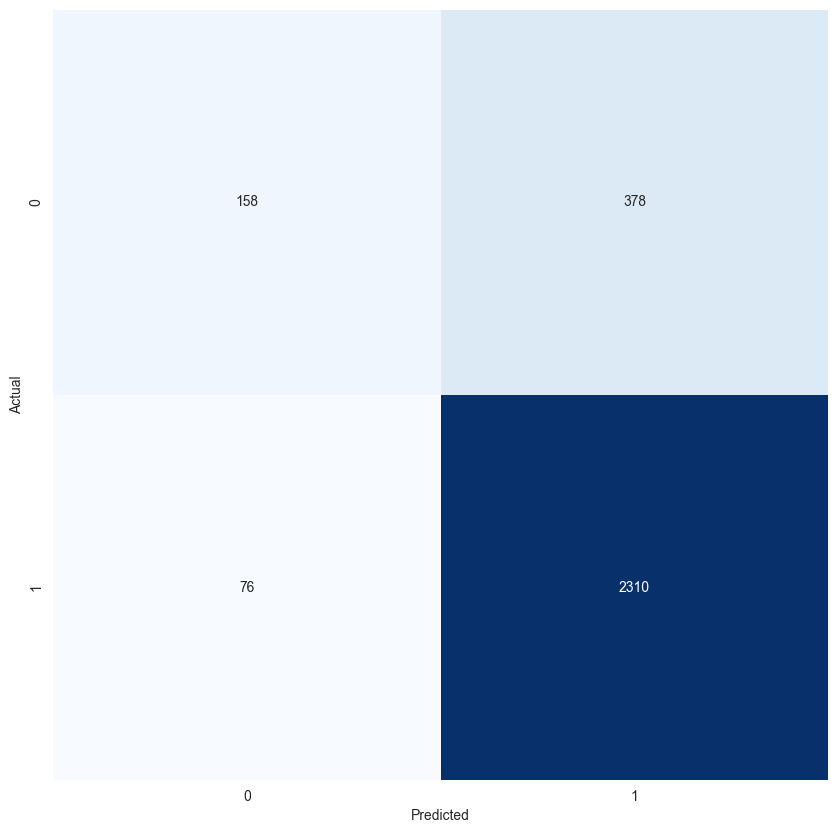

In [342]:
print(confusion_matrix(test_labels, y_pred_lr))

# print the confusion matrix using seaborn

cm = confusion_matrix(test_labels, y_pred_lr)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [343]:
# from sklearn.metrics import precision_recall_curve
# import matplotlib.pyplot as plt

# y_pred_prob_lr_r = best_model_lr.predict_proba(test_features)

# Assume y_test are your true binary labels and y_scores are the score predicted by the model
# precision, recall, _ = precision_recall_curve(binary_train_labels, y_pred_prob_lr_r)

# plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, label='Precision-Recall curve')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.legend(loc="lower left")
# plt.show()

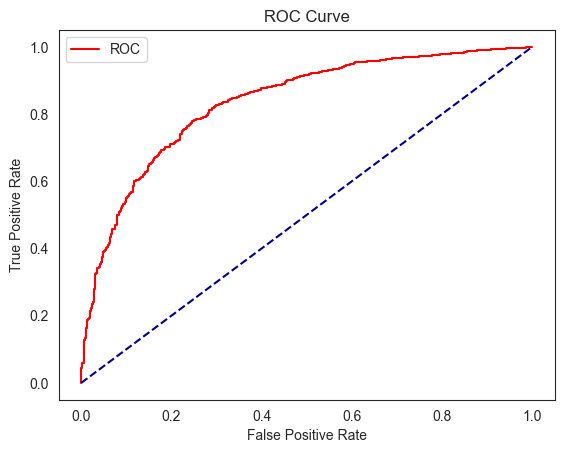

In [344]:
# roc curve for rock and hip hop
from sklearn.metrics import roc_curve

y_pred_prob_lr = best_model_lr.predict_proba(test_features_pca)[:, 1]

fpr_lr, tpr_lr, thresholds_lr = roc_curve(test_labels, y_pred_prob_lr, pos_label="Hip-Hop")

plt.plot(tpr_lr, fpr_lr, color="red", label="ROC")
plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [345]:
y_pred_train_proba = best_model_lr.predict_proba(test_features_pca)

best_th = umbral_optimo(y_pred_train_proba,binary_test_labels,thresholds_lr)
print('El mejor umbral es {:.4f}.'.format(best_th))

El mejor umbral es 0.7778.


In [346]:
y_pred_proba = best_model_lr.predict_proba(test_features_pca)

umbral = 0.7778
y_pred_lr = (y_pred_proba[:, 1] >= umbral).astype(int)

# Compute and print metrics
print("Accuracy: {}".format(best_model_lr.score(test_features_pca, test_labels)))
print(classification_report(binary_test_labels, y_pred_lr))
print("Tuned Model Parameters: {}".format(best_model_lr.best_params_))

Accuracy: 0.8446269678302533
              precision    recall  f1-score   support

           0       0.43      0.75      0.55       536
           1       0.93      0.78      0.85      2386

    accuracy                           0.77      2922
   macro avg       0.68      0.77      0.70      2922
weighted avg       0.84      0.77      0.79      2922

Tuned Model Parameters: {'log_reg__C': 0.01, 'log_reg__penalty': 'l2'}


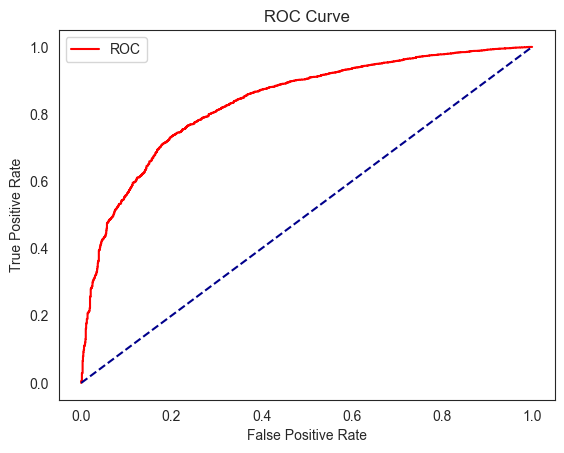

In [347]:
from sklearn.metrics import roc_curve

y_pred_prob_lr = best_model_lr.predict_proba(train_features_pca)[:, 1]

fpr_lr, tpr_lr, thresholds_lr = roc_curve(train_labels, y_pred_prob_lr, pos_label="Hip-Hop")

plt.plot(tpr_lr, fpr_lr, color="red", label="ROC")
plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [348]:
y_pred_train_proba = best_model_lr.predict_proba(train_features_pca)

best_th = umbral_optimo(y_pred_train_proba,binary_train_labels,thresholds_lr)
print('El mejor umbral es {:.4f}.'.format(best_th))

El mejor umbral es 0.8027.


In [349]:
y_pred_proba = best_model_lr.predict_proba(train_features_pca)

umbral = 0.8027
y_pred_lr = (y_pred_proba[:, 1] >= umbral).astype(int)

# Compute and print metrics
print("Accuracy: {}".format(best_model_lr.score(train_features_pca, train_labels)))
print(classification_report(binary_train_labels, y_pred_lr))
print("Tuned Model Parameters: {}".format(best_model_lr.best_params_))

Accuracy: 0.8352889410384277
              precision    recall  f1-score   support

           0       0.42      0.79      0.54      1278
           1       0.94      0.74      0.83      5540

    accuracy                           0.75      6818
   macro avg       0.68      0.77      0.69      6818
weighted avg       0.84      0.75      0.78      6818

Tuned Model Parameters: {'log_reg__C': 0.01, 'log_reg__penalty': 'l2'}


## Decision tree


In [350]:
# Define the model as a Decision Tree classifier and fit the model to the data.
decision_tree = DecisionTreeClassifier()

steps = [("decision_tree", DecisionTreeClassifier(random_state=42))]
pipeline = Pipeline(steps)

# Define the hyperparameter configuration space for the Decision Tree classifier.
parameters = {"decision_tree__max_depth": np.arange(1, 10),  # Adjust max_depth or other parameters as needed
              "decision_tree__min_samples_leaf": [1, 5, 10, 20]}  # Example hyperparameters to tune

# Create the GridSearchCV object. We will use 5-fold cross-validation.
best_model_dt = GridSearchCV(pipeline, param_grid=parameters, cv=5)

# Fit the model to the training set.
best_model_dt.fit(train_features_pca, train_labels)

# Predict the labels of the test set: y_pred
y_pred_bt = best_model_dt.predict(test_features_pca)

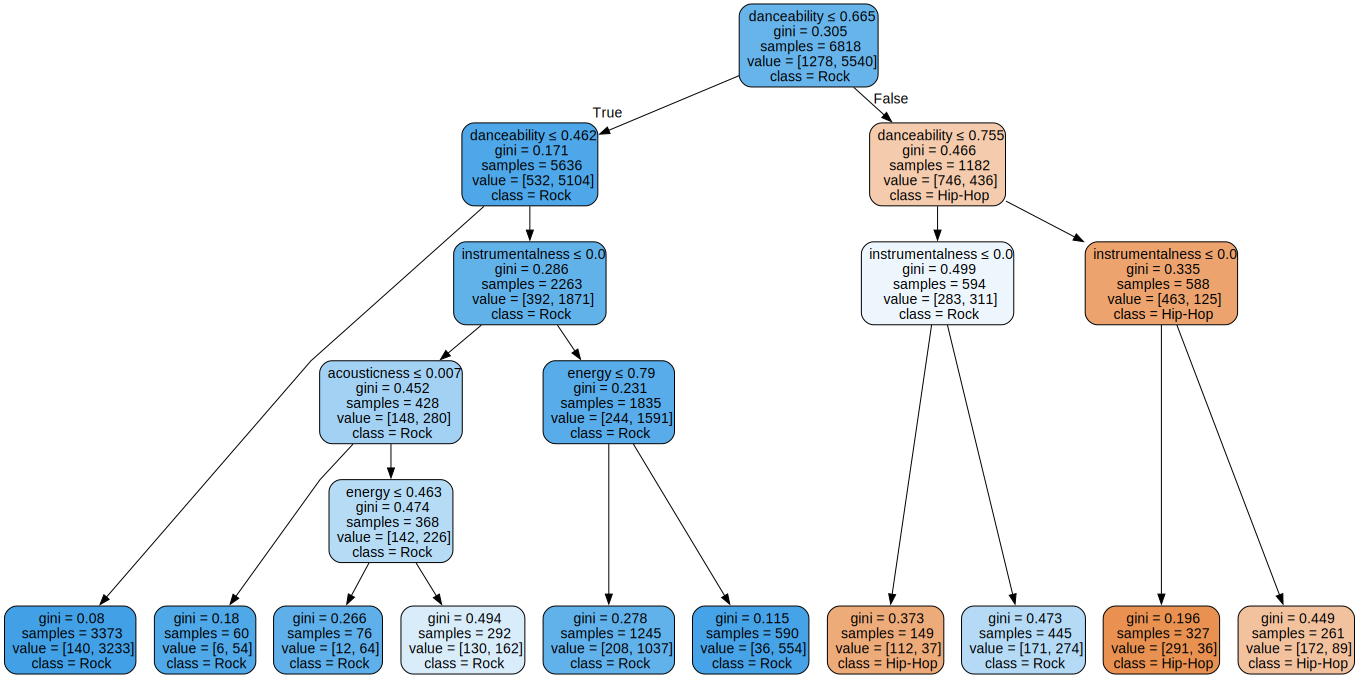

In [351]:
from sklearn import tree

dt_model = tree.DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, random_state=42)
dt_model.fit(train_features, train_labels)

dot_data = tree.export_graphviz(dt_model, out_file=None, feature_names=train_features.columns, class_names=['Hip-Hop', 'Rock'], filled=True, rounded=True, special_characters=True, leaves_parallel=True)
graph = graphviz.Source(dot_data)
graph

# dot_data = tree.export_graphviz(best_model_dt, out_file=None, feature_names=train_features_pca.values, class_names=['Hip-Hop', 'Rock'], filled=True, rounded=True, special_characters=True, leaves_parallel=True)
# graph = graphviz.Source(dot_data)
# graph

In [352]:
import pydot

(graph,) = pydot.graph_from_dot_data(dot_data)
graph.write_png("dtree.png")

### Metrics

In [353]:
# Compute and print metrics
print("Accuracy: {}".format(best_model_dt.score(test_features_pca, test_labels)))
print(classification_report(test_labels, y_pred_bt))
print("Tuned Model Parameters: {}".format(best_model_dt.best_params_))

Accuracy: 0.8415468856947297
              precision    recall  f1-score   support

     Hip-Hop       0.68      0.26      0.38       536
        Rock       0.85      0.97      0.91      2386

    accuracy                           0.84      2922
   macro avg       0.77      0.62      0.64      2922
weighted avg       0.82      0.84      0.81      2922

Tuned Model Parameters: {'decision_tree__max_depth': 5, 'decision_tree__min_samples_leaf': 10}


In [354]:
y_pred_dt = best_model_dt.predict(train_features_pca)

# Compute and print metrics
print("Accuracy: {}".format(best_model_dt.score(train_features_pca, train_labels)))
print(classification_report(train_labels, y_pred_dt))
print("Tuned Model Parameters: {}".format(best_model_dt.best_params_))

Accuracy: 0.8464359049574656
              precision    recall  f1-score   support

     Hip-Hop       0.70      0.32      0.43      1278
        Rock       0.86      0.97      0.91      5540

    accuracy                           0.85      6818
   macro avg       0.78      0.64      0.67      6818
weighted avg       0.83      0.85      0.82      6818

Tuned Model Parameters: {'decision_tree__max_depth': 5, 'decision_tree__min_samples_leaf': 10}


[[ 140  396]
 [  67 2319]]


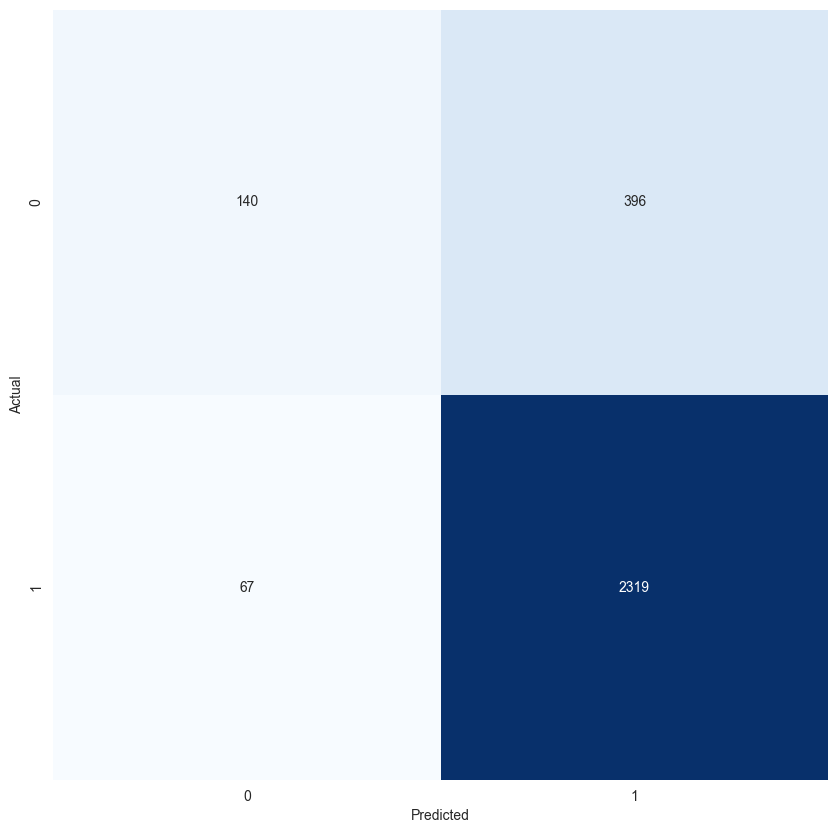

In [355]:
print(confusion_matrix(test_labels, y_pred_bt))

# print the confusion matrix using seaborn

cm = confusion_matrix(test_labels, y_pred_bt)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

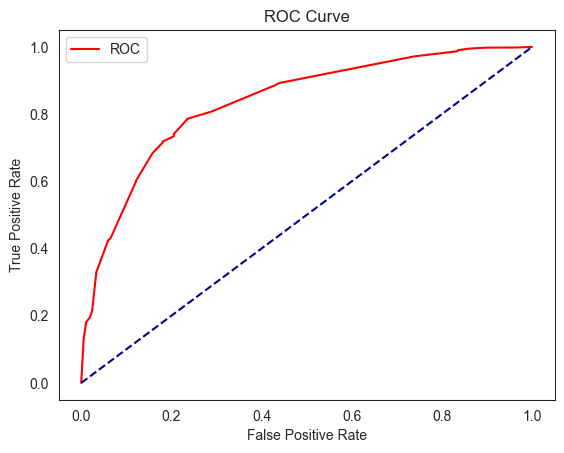

In [356]:
# roc curve for rock and hip hop
from sklearn.metrics import roc_curve


y_pred_prob_dt = best_model_dt.predict_proba(test_features_pca)[:, 1]

fpr_dt, tpr_dt, thresholds_dt = roc_curve(test_labels, y_pred_prob_dt, pos_label="Hip-Hop")

plt.plot(tpr_dt, fpr_dt, color="red", label="ROC")
plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [357]:
y_pred_train_proba = best_model_dt.predict_proba(test_features_pca)

best_th = umbral_optimo(y_pred_train_proba,binary_test_labels,thresholds_dt)
print('El mejor umbral es {:.4f}.'.format(best_th))

El mejor umbral es 0.7273.


In [358]:
y_pred_proba = best_model_dt.predict_proba(test_features_pca)

umbral = 0.7273
y_pred_bt = (y_pred_proba[:, 1] >= umbral).astype(int)

# Compute and print metrics
print("Accuracy: {}".format(best_model_dt.score(test_features_pca, test_labels)))
print(classification_report(binary_test_labels, y_pred_bt))
print("Tuned Model Parameters: {}".format(best_model_dt.best_params_))

Accuracy: 0.8415468856947297
              precision    recall  f1-score   support

           0       0.44      0.76      0.56       536
           1       0.94      0.78      0.85      2386

    accuracy                           0.78      2922
   macro avg       0.69      0.77      0.71      2922
weighted avg       0.85      0.78      0.80      2922

Tuned Model Parameters: {'decision_tree__max_depth': 5, 'decision_tree__min_samples_leaf': 10}


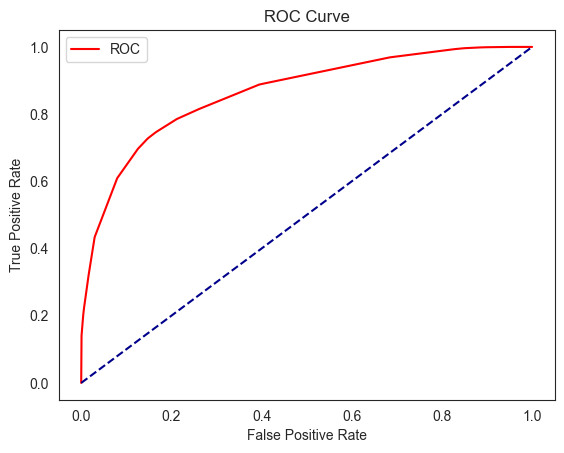

In [359]:
# roc curve for rock and hip hop
from sklearn.metrics import roc_curve


y_pred_prob_dt = best_model_dt.predict_proba(train_features_pca)[:, 1]

fpr_dt, tpr_dt, thresholds_dt = roc_curve(train_labels, y_pred_prob_dt, pos_label="Hip-Hop")

plt.plot(tpr_dt, fpr_dt, color="red", label="ROC")
plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [360]:
y_pred_train_proba = best_model_dt.predict_proba(train_features_pca)

best_th = umbral_optimo(y_pred_train_proba,binary_train_labels,thresholds_dt)
print('El mejor umbral es {:.4f}.'.format(best_th))

El mejor umbral es 0.7849.


In [361]:
y_pred_proba = best_model_dt.predict_proba(train_features_pca)

umbral = 0.7849
y_pred_bt = (y_pred_proba[:, 1] >= umbral).astype(int)

# Compute and print metrics
print("Accuracy: {}".format(best_model_dt.score(train_features_pca, train_labels)))
print(classification_report(binary_train_labels, y_pred_bt))
print("Tuned Model Parameters: {}".format(best_model_dt.best_params_))

Accuracy: 0.8464359049574656
              precision    recall  f1-score   support

           0       0.46      0.79      0.58      1278
           1       0.94      0.79      0.86      5540

    accuracy                           0.79      6818
   macro avg       0.70      0.79      0.72      6818
weighted avg       0.85      0.79      0.80      6818

Tuned Model Parameters: {'decision_tree__max_depth': 5, 'decision_tree__min_samples_leaf': 10}


## KNN


## Pipeline

In [362]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


# Define the model as the K-Nearest Neighbors classifier and fit the model to the data.
knn = KNeighborsClassifier()

steps = [("knn", KNeighborsClassifier())]
pipeline = Pipeline(steps)

# Define the hyperparameter configuration space. Here, we are tuning the number of neighbors in the range 1 to 24.
parameters = {
    "knn__n_neighbors": np.arange(1, 25),
    "knn__weights": ["uniform", "distance"],
    "knn__metric": ["euclidean", "manhattan", "minkowski"],
}

# Create the GridSearchCV object. We will use 5-fold cross-validation.
best_model_knn = GridSearchCV(pipeline, param_grid=parameters, cv=5)

# Fit the model to the training set.
best_model_knn.fit(train_features_pca, train_labels)

# Predict the labels of the test set: y_pred
y_pred_knn = best_model_knn.predict(test_features_pca)

Metrics

In [363]:
# Compute and print metrics
print("Accuracy: {}".format(best_model_knn.score(test_features_pca, test_labels)))
print(classification_report(test_labels, y_pred_knn))
print("Tuned Model Parameters: {}".format(best_model_knn.best_params_))

Accuracy: 0.8456536618754278
              precision    recall  f1-score   support

     Hip-Hop       0.63      0.38      0.47       536
        Rock       0.87      0.95      0.91      2386

    accuracy                           0.85      2922
   macro avg       0.75      0.67      0.69      2922
weighted avg       0.83      0.85      0.83      2922

Tuned Model Parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 21, 'knn__weights': 'distance'}


In [364]:
y_pred_knn_train = best_model_knn.predict(train_features_pca)

# Compute and print metrics
print("Accuracy: {}".format(best_model_knn.score(train_features_pca, train_labels)))
print(classification_report(train_labels, y_pred_knn_train))
print("Tuned Model Parameters: {}".format(best_model_knn.best_params_))

Accuracy: 1.0
              precision    recall  f1-score   support

     Hip-Hop       1.00      1.00      1.00      1278
        Rock       1.00      1.00      1.00      5540

    accuracy                           1.00      6818
   macro avg       1.00      1.00      1.00      6818
weighted avg       1.00      1.00      1.00      6818

Tuned Model Parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 21, 'knn__weights': 'distance'}


[[ 204  332]
 [ 119 2267]]


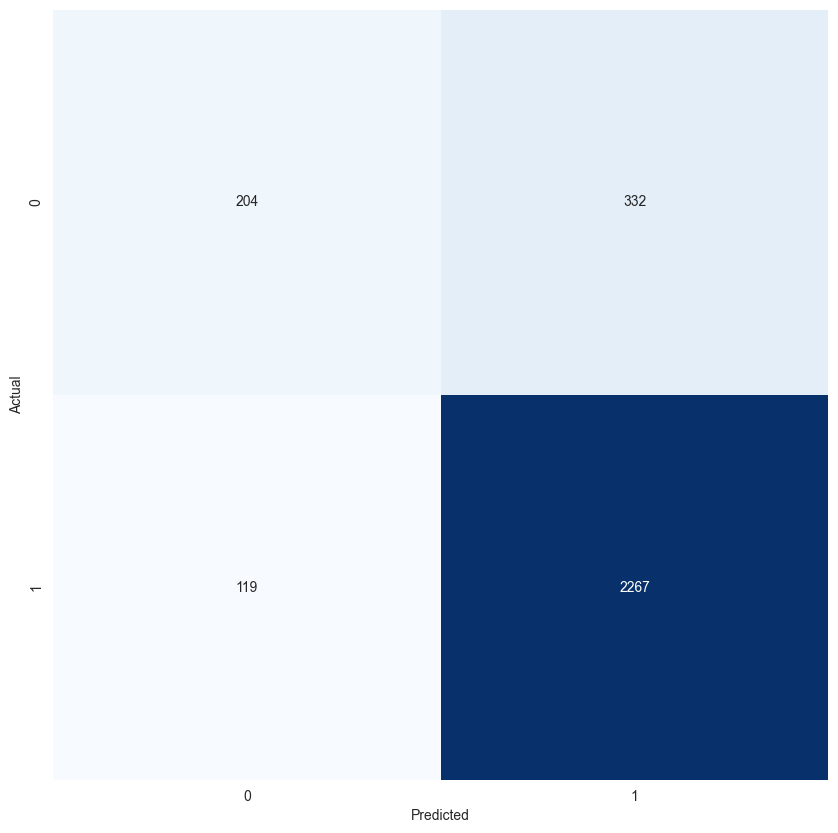

In [365]:
print(confusion_matrix(test_labels, y_pred_knn))

# print the confusion matrix using seaborn

cm = confusion_matrix(test_labels, y_pred_knn)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Roc

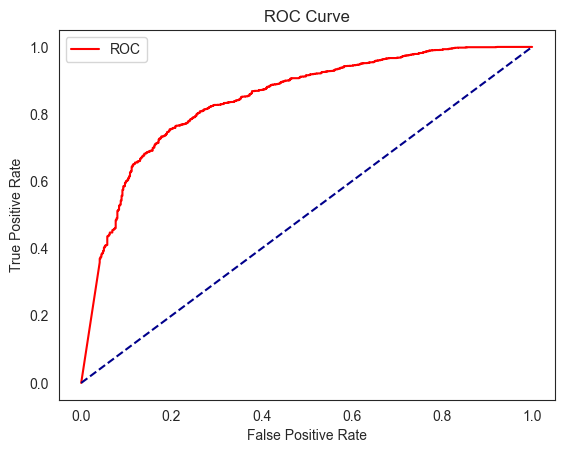

In [366]:
# roc curve for rock and hip hop
from sklearn.metrics import roc_curve


y_pred_prob_knn = best_model_knn.predict_proba(test_features_pca)[:, 1]

fpr_knn, tpr_knn, thresholds_knn = roc_curve(test_labels, y_pred_prob_knn, pos_label="Hip-Hop")

plt.plot(tpr_knn, fpr_knn, color="red", label="ROC")
plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [367]:
y_pred_train_proba = best_model_knn.predict_proba(test_features_pca)

best_th = umbral_optimo(y_pred_train_proba,binary_test_labels,thresholds_knn)
print('El mejor umbral es {:.4f}.'.format(best_th))

El mejor umbral es 0.8054.


In [368]:
y_pred_proba = best_model_knn.predict_proba(test_features_pca)

umbral = 0.8054
y_pred_knn = (y_pred_proba[:, 1] >= umbral).astype(int)

# Compute and print metrics
print("Accuracy: {}".format(best_model_knn.score(test_features_pca, test_labels)))
print(classification_report(binary_test_labels, y_pred_knn))
print("Tuned Model Parameters: {}".format(best_model_knn.best_params_))

Accuracy: 0.8456536618754278
              precision    recall  f1-score   support

           0       0.42      0.80      0.56       536
           1       0.94      0.75      0.84      2386

    accuracy                           0.76      2922
   macro avg       0.68      0.78      0.70      2922
weighted avg       0.85      0.76      0.79      2922

Tuned Model Parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 21, 'knn__weights': 'distance'}


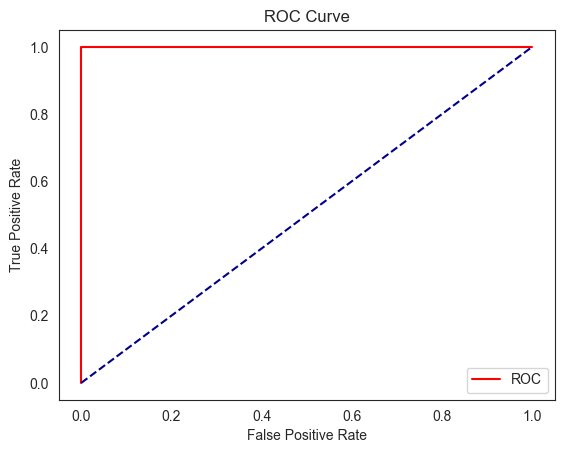

In [369]:
# roc curve for rock and hip hop
from sklearn.metrics import roc_curve


y_pred_prob_knn = best_model_knn.predict_proba(train_features_pca)[:, 1]

fpr_knn, tpr_knn, thresholds_knn = roc_curve(train_labels, y_pred_prob_knn, pos_label="Hip-Hop")

plt.plot(tpr_knn, fpr_knn, color="red", label="ROC")
plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [370]:
y_pred_train_proba = best_model_knn.predict_proba(train_features_pca)

best_th = umbral_optimo(y_pred_train_proba,binary_train_labels,thresholds_knn)
print('El mejor umbral es {:.4f}.'.format(best_th))

El mejor umbral es 1.0000.


In [371]:
y_pred_proba = best_model_knn.predict_proba(train_features_pca)

umbral = 1.0000
y_pred_knn = (y_pred_proba[:, 1] >= umbral).astype(int)

# Compute and print metrics
print("Accuracy: {}".format(best_model_knn.score(train_features_pca, train_labels)))
print(classification_report(binary_train_labels, y_pred_knn))
print("Tuned Model Parameters: {}".format(best_model_knn.best_params_))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1278
           1       1.00      1.00      1.00      5540

    accuracy                           1.00      6818
   macro avg       1.00      1.00      1.00      6818
weighted avg       1.00      1.00      1.00      6818

Tuned Model Parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 21, 'knn__weights': 'distance'}


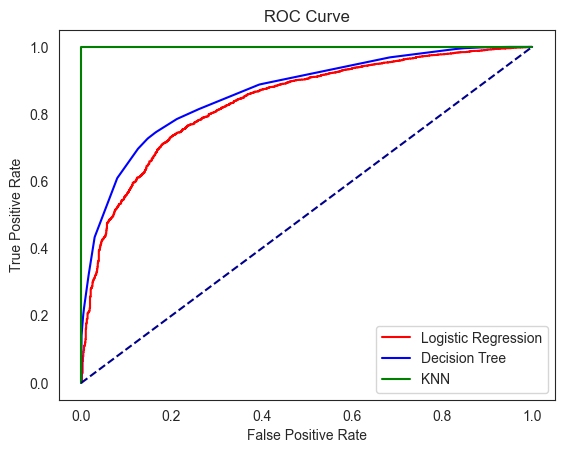

In [372]:
plt.plot(tpr_lr, fpr_lr, color="red", label="Logistic Regression")
plt.plot(tpr_dt, fpr_dt, color="blue", label="Decision Tree")
plt.plot(tpr_knn, fpr_knn, color="green", label="KNN")
plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Balanced


## Scaling


In [373]:
## Scaling
# Scale the features and store the values in a new variable
scaler = StandardScaler()
scaled_train_features_res = scaler.fit_transform(train_features_res)
scaled_test_features = scaler.transform(test_features)

## PCA


In [374]:
pca = PCA(n_components=3) # change the n_components to your desired number
train_features_pca_res = pca.fit_transform(scaled_train_features_res)

## Logistic regression


In [375]:
from sklearn.linear_model import LogisticRegression

# Define the pipeline including StandardScaler and LogisticRegression
steps = [("log_reg", LogisticRegression(random_state=42))]
pipeline = Pipeline(steps)

# Define the hyperparameter configuration space.
parameters = {
    "log_reg__C": [0.01],
    "log_reg__penalty": ['l1', 'l2']
}

# Create the GridSearchCV object. We will use 5-fold cross-validation.
best_model_lr_res = GridSearchCV(pipeline, param_grid=parameters, cv=5)

# Fit the model to the training set.
best_model_lr_res.fit(train_features_pca_res, train_labels_res)

# Predict the labels of the test set: y_pred
y_pred_lr_res = best_model_lr_res.predict(test_features_pca)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/l

In [376]:
# Compute and print metrics
print("Accuracy: {}".format(best_model_lr_res.score(test_features_pca, test_labels)))
print(classification_report(test_labels, y_pred_lr_res))
print("Tuned Model Parameters: {}".format(best_model_lr.best_params_))

Accuracy: 0.6553730321697467
              precision    recall  f1-score   support

     Hip-Hop       0.33      0.86      0.48       536
        Rock       0.95      0.61      0.74      2386

    accuracy                           0.66      2922
   macro avg       0.64      0.74      0.61      2922
weighted avg       0.84      0.66      0.69      2922

Tuned Model Parameters: {'log_reg__C': 0.01, 'log_reg__penalty': 'l2'}


In [377]:
y_pred_lr_res_train = best_model_lr_res.predict(train_features_pca)

print("Accuracy: {}".format(best_model_lr_res.score(train_features_pca, train_labels)))
print(classification_report(train_labels, y_pred_lr_res_train))
print("Tuned Model Parameters: {}".format(best_model_lr.best_params_))

Accuracy: 0.6644177178058082


              precision    recall  f1-score   support

     Hip-Hop       0.34      0.87      0.49      1278
        Rock       0.95      0.62      0.75      5540

    accuracy                           0.66      6818
   macro avg       0.65      0.74      0.62      6818
weighted avg       0.84      0.66      0.70      6818

Tuned Model Parameters: {'log_reg__C': 0.01, 'log_reg__penalty': 'l2'}


[[ 463   73]
 [ 934 1452]]


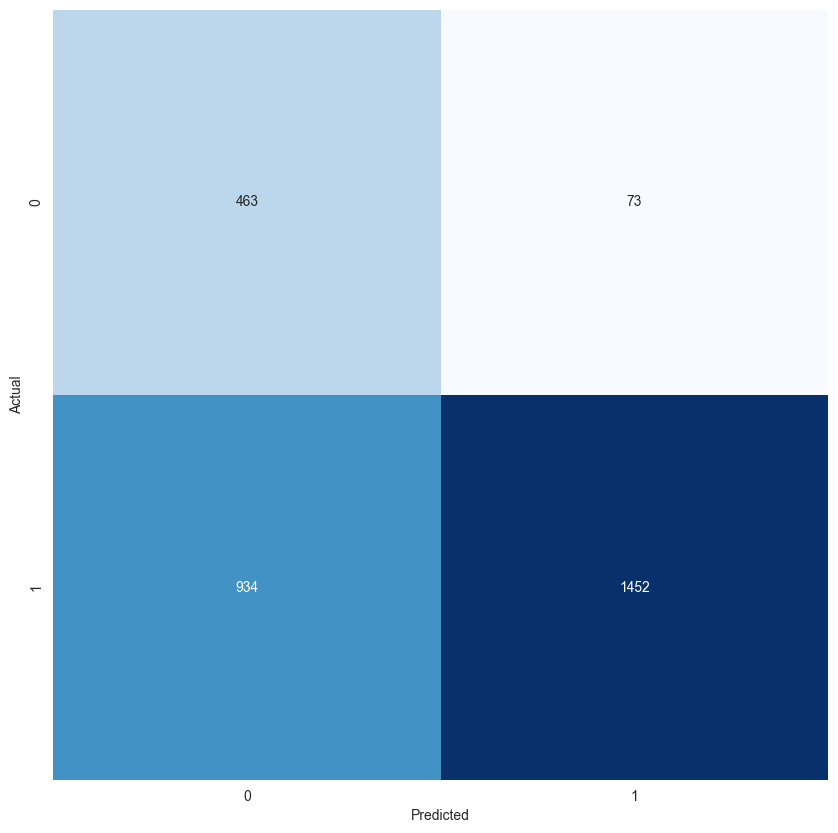

In [378]:
print(confusion_matrix(test_labels, y_pred_lr_res))

# print the confusion matrix using seaborn

cm = confusion_matrix(test_labels, y_pred_lr_res)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

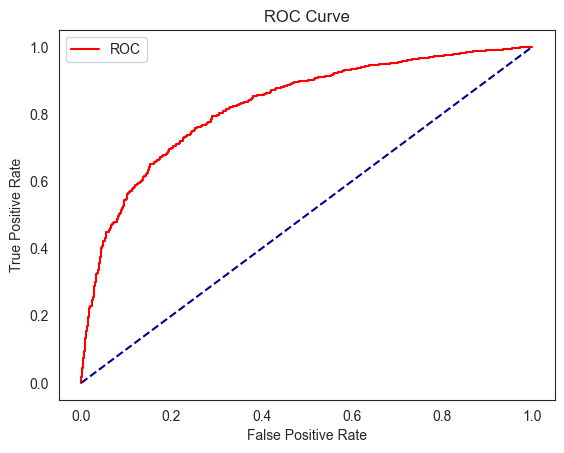

In [379]:
# roc curve for rock and hip hop
from sklearn.metrics import roc_curve

y_pred_prob_lr_res = best_model_lr_res.predict_proba(test_features_pca)[:, 1]

fpr_lr_res, tpr_lr_res, thresholds_lr_res = roc_curve(test_labels, y_pred_prob_lr_res, pos_label="Hip-Hop")

plt.plot(tpr_lr_res, fpr_lr_res, color="red", label="ROC")
plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [380]:
y_pred_train_proba_lr_res = best_model_lr_res.predict_proba(test_features_pca)

best_th = umbral_optimo(y_pred_train_proba_lr_res,binary_test_labels,thresholds_lr_res)
print('El mejor umbral es {:.4f}.'.format(best_th))

El mejor umbral es 0.3373.


In [381]:
y_pred_proba = best_model_lr_res.predict_proba(test_features_pca)

umbral = 0.3373
y_pred_lr_res = (y_pred_proba[:, 1] >= umbral).astype(int)

# Compute and print metrics
print("Accuracy: {}".format(best_model_lr_res.score(test_features_pca, test_labels)))
print(classification_report(binary_test_labels, y_pred_lr_res))
print("Tuned Model Parameters: {}".format(best_model_lr_res.best_params_))

Accuracy: 0.6553730321697467
              precision    recall  f1-score   support

           0       0.41      0.75      0.53       536
           1       0.93      0.76      0.84      2386

    accuracy                           0.76      2922
   macro avg       0.67      0.75      0.68      2922
weighted avg       0.84      0.76      0.78      2922

Tuned Model Parameters: {'log_reg__C': 0.01, 'log_reg__penalty': 'l2'}


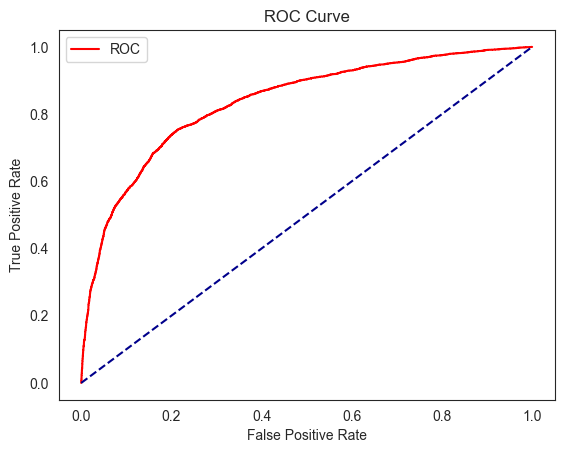

In [382]:
# roc curve for rock and hip hop
from sklearn.metrics import roc_curve

y_pred_prob_lr_res = best_model_lr_res.predict_proba(train_features_pca_res)[:, 1]

fpr_lr_res, tpr_lr_res, thresholds_lr_res = roc_curve(train_labels_res, y_pred_prob_lr_res, pos_label="Hip-Hop")

plt.plot(tpr_lr_res, fpr_lr_res, color="red", label="ROC")
plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [383]:
y_pred_train_proba_lr_res = best_model_lr_res.predict_proba(train_features_pca_res)

best_th = umbral_optimo(y_pred_train_proba_lr_res,binary_train_labels_res,thresholds_lr_res)
print('El mejor umbral es {:.4f}.'.format(best_th))

El mejor umbral es 0.4911.


In [384]:
y_pred_proba = best_model_lr_res.predict_proba(train_features_pca_res)

umbral = 0.4911
y_pred_lr_res = (y_pred_proba[:, 1] >= umbral).astype(int)

# Compute and print metrics
print("Accuracy: {}".format(best_model_lr_res.score(train_features_pca_res, train_labels_res)))
print(classification_report(binary_train_labels_res, y_pred_lr_res))
print("Tuned Model Parameters: {}".format(best_model_lr_res.best_params_))

Accuracy: 0.7694945848375452
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      5540
           1       0.78      0.75      0.77      5540

    accuracy                           0.77     11080
   macro avg       0.77      0.77      0.77     11080
weighted avg       0.77      0.77      0.77     11080

Tuned Model Parameters: {'log_reg__C': 0.01, 'log_reg__penalty': 'l2'}


## Decision tree


In [385]:
# Define the model as a Decision Tree classifier and fit the model to the data.
decision_tree = DecisionTreeClassifier()

steps = [("decision_tree", DecisionTreeClassifier(random_state=42))]
pipeline = Pipeline(steps)

# Define the hyperparameter configuration space for the Decision Tree classifier.
parameters = {"decision_tree__max_depth": np.arange(1, 10),  # Adjust max_depth or other parameters as needed
              "decision_tree__min_samples_leaf": [1, 5, 10, 20]}  # Example hyperparameters to tune

# Create the GridSearchCV object. We will use 5-fold cross-validation.
best_model_dt_res = GridSearchCV(pipeline, param_grid=parameters, cv=5)

# Fit the model to the training set.
best_model_dt_res.fit(train_features_pca_res, train_labels_res)

# Predict the labels of the test set: y_pred
y_pred_bt_res = best_model_dt_res.predict(test_features_pca)

In [386]:
# Compute and print metrics
print("Accuracy: {}".format(best_model_dt_res.score(test_features_pca, test_labels)))
print(classification_report(test_labels, y_pred_bt_res))
print("Tuned Model Parameters: {}".format(best_model_dt_res.best_params_))

Accuracy: 0.6492128678986995
              precision    recall  f1-score   support

     Hip-Hop       0.32      0.84      0.47       536
        Rock       0.94      0.61      0.74      2386

    accuracy                           0.65      2922
   macro avg       0.63      0.72      0.60      2922
weighted avg       0.83      0.65      0.69      2922

Tuned Model Parameters: {'decision_tree__max_depth': 7, 'decision_tree__min_samples_leaf': 5}


In [387]:
y_pred_bt_res_train = best_model_dt_res.predict(train_features_pca)

# Compute and print metrics
print("Accuracy: {}".format(best_model_dt_res.score(train_features_pca, train_labels)))
print(classification_report(train_labels, y_pred_bt_res_train))
print("Tuned Model Parameters: {}".format(best_model_dt_res.best_params_))

Accuracy: 0.6563508360222939
              precision    recall  f1-score   support

     Hip-Hop       0.33      0.84      0.48      1278
        Rock       0.94      0.61      0.74      5540

    accuracy                           0.66      6818
   macro avg       0.64      0.73      0.61      6818
weighted avg       0.83      0.66      0.69      6818

Tuned Model Parameters: {'decision_tree__max_depth': 7, 'decision_tree__min_samples_leaf': 5}


[[ 449   87]
 [ 938 1448]]


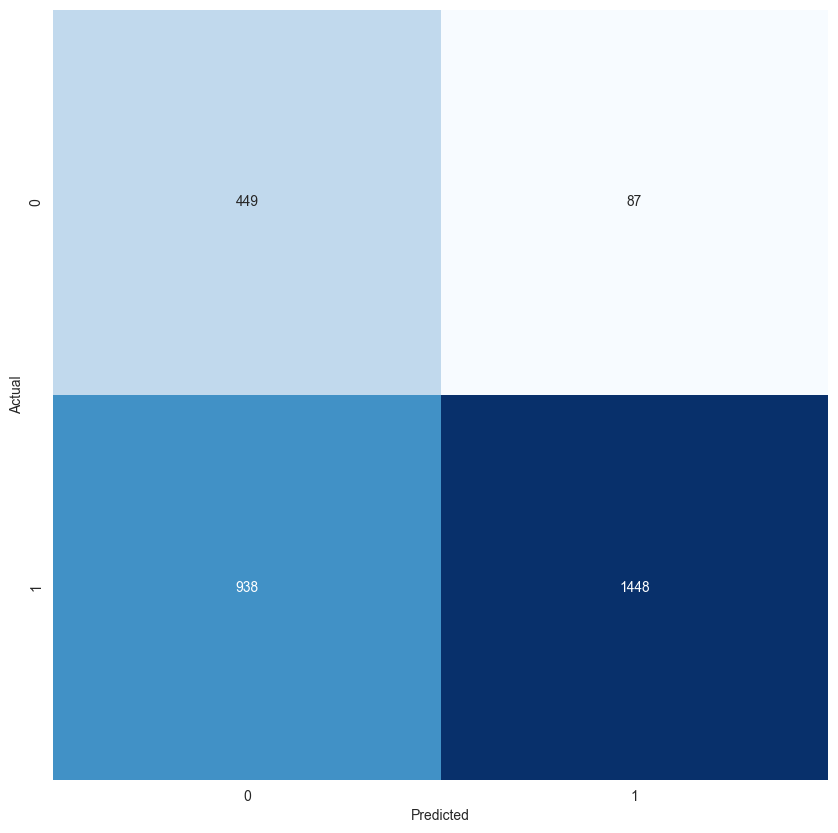

In [388]:
print(confusion_matrix(test_labels, y_pred_bt_res))

# print the confusion matrix using seaborn

cm = confusion_matrix(test_labels, y_pred_bt_res)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

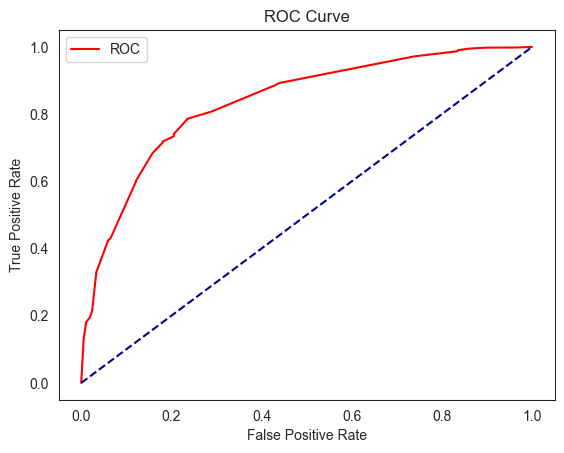

In [389]:
# roc curve for rock and hip hop
from sklearn.metrics import roc_curve


y_pred_prob_test_dt_res = best_model_dt.predict_proba(test_features_pca)[:, 1]

fpr_dt_res, tpr_dt_res, thresholds_dt_res = roc_curve(test_labels, y_pred_prob_test_dt_res, pos_label="Hip-Hop")

plt.plot(tpr_dt_res, fpr_dt_res, color="red", label="ROC")
plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [390]:
y_pred_train_proba_dt_res = best_model_dt_res.predict_proba(test_features_pca)

best_th = umbral_optimo(y_pred_train_proba_dt_res,binary_test_labels,thresholds_dt_res)
print('El mejor umbral es {:.4f}.'.format(best_th))

El mejor umbral es 0.3590.


In [391]:
y_pred_proba = best_model_dt_res.predict_proba(test_features_pca)

umbral = 0.3590
y_pred_dt_res = (y_pred_proba[:, 1] >= umbral).astype(int)

# Compute and print metrics
print("Accuracy: {}".format(best_model_dt_res.score(test_features_pca, test_labels)))
print(classification_report(binary_test_labels, y_pred_dt_res))
print("Tuned Model Parameters: {}".format(best_model_dt_res.best_params_))

Accuracy: 0.6492128678986995
              precision    recall  f1-score   support

           0       0.35      0.80      0.49       536
           1       0.94      0.67      0.78      2386

    accuracy                           0.69      2922
   macro avg       0.64      0.73      0.63      2922
weighted avg       0.83      0.69      0.73      2922

Tuned Model Parameters: {'decision_tree__max_depth': 7, 'decision_tree__min_samples_leaf': 5}


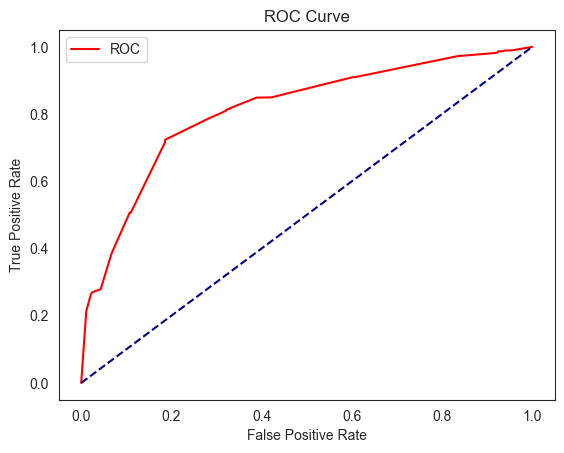

In [392]:
# roc curve for rock and hip hop
from sklearn.metrics import roc_curve


y_pred_prob_train_dt_res = best_model_dt.predict_proba(train_features_pca_res)[:, 1]

fpr_dt_res, tpr_dt_res, thresholds_dt_res = roc_curve(train_labels_res, y_pred_prob_train_dt_res, pos_label="Hip-Hop")

plt.plot(tpr_dt_res, fpr_dt_res, color="red", label="ROC")
plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [393]:
y_pred_train_proba_dt_res = best_model_dt_res.predict_proba(train_features_pca_res)

best_th = umbral_optimo(y_pred_train_proba_dt_res,binary_train_labels_res,thresholds_dt_res)
print('El mejor umbral es {:.4f}.'.format(best_th))

El mejor umbral es 0.4252.


In [394]:
y_pred_proba = best_model_dt_res.predict_proba(train_features_pca_res)

umbral = 0.4252
y_pred_dt_res = (y_pred_proba[:, 1] >= umbral).astype(int)

# Compute and print metrics
print("Accuracy: {}".format(best_model_dt_res.score(train_features_pca_res, train_labels_res)))
print(classification_report(binary_train_labels_res, y_pred_dt_res))
print("Tuned Model Parameters: {}".format(best_model_dt_res.best_params_))

Accuracy: 0.8135379061371841
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      5540
           1       0.85      0.77      0.80      5540

    accuracy                           0.81     11080
   macro avg       0.82      0.81      0.81     11080
weighted avg       0.82      0.81      0.81     11080

Tuned Model Parameters: {'decision_tree__max_depth': 7, 'decision_tree__min_samples_leaf': 5}


## KNN


## Pipeline

In [395]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


# Define the model as the K-Nearest Neighbors classifier and fit the model to the data.
knn = KNeighborsClassifier()

steps = [("knn", KNeighborsClassifier())]
pipeline = Pipeline(steps)

# Define the hyperparameter configuration space. Here, we are tuning the number of neighbors in the range 1 to 24.
parameters = {
    "knn__n_neighbors": np.arange(1, 25),
    "knn__weights": ["uniform", "distance"],
    "knn__metric": ["euclidean", "manhattan", "minkowski"],
}

# Create the GridSearchCV object. We will use 5-fold cross-validation.
best_model_knn_res = GridSearchCV(pipeline, param_grid=parameters, cv=5)

# Fit the model to the training set.
best_model_knn_res.fit(train_features_pca_res, train_labels_res)

# Predict the labels of the test set: y_pred
y_pred_knn_res = best_model_knn_res.predict(test_features_pca)

Metrics

In [396]:
# Compute and print metrics
print("Accuracy: {}".format(best_model_knn_res.score(test_features_pca, test_labels)))
print(classification_report(test_labels, y_pred_knn_res))
print("Tuned Model Parameters: {}".format(best_model_knn_res.best_params_))

Accuracy: 0.6550308008213552
              precision    recall  f1-score   support

     Hip-Hop       0.31      0.69      0.42       536
        Rock       0.90      0.65      0.75      2386

    accuracy                           0.66      2922
   macro avg       0.60      0.67      0.59      2922
weighted avg       0.79      0.66      0.69      2922

Tuned Model Parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}


In [397]:
y_pred_knn_res_train = best_model_knn_res.predict(train_features_pca)

# Compute and print metrics
print("Accuracy: {}".format(best_model_knn_res.score(train_features_pca, train_labels)))
print(classification_report(train_labels, y_pred_knn_res_train))
print("Tuned Model Parameters: {}".format(best_model_knn_res.best_params_))

Accuracy: 0.660164271047228
              precision    recall  f1-score   support

     Hip-Hop       0.32      0.71      0.44      1278
        Rock       0.91      0.65      0.76      5540

    accuracy                           0.66      6818
   macro avg       0.61      0.68      0.60      6818
weighted avg       0.80      0.66      0.70      6818

Tuned Model Parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}


[[ 370  166]
 [ 842 1544]]


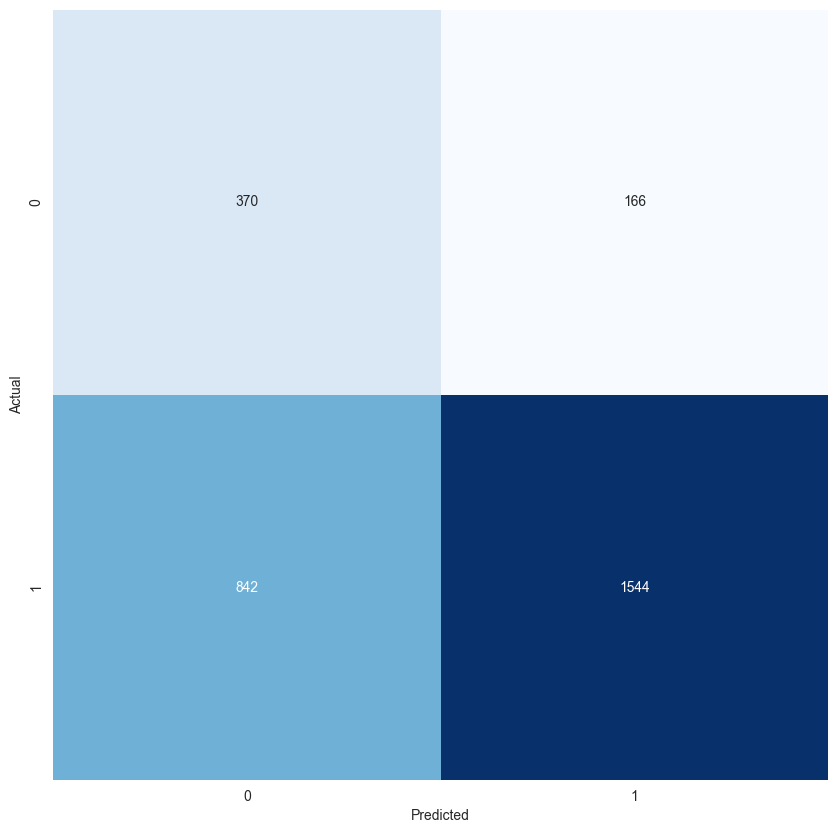

In [398]:
print(confusion_matrix(test_labels, y_pred_knn_res))

# print the confusion matrix using seaborn

cm = confusion_matrix(test_labels, y_pred_knn_res)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Roc

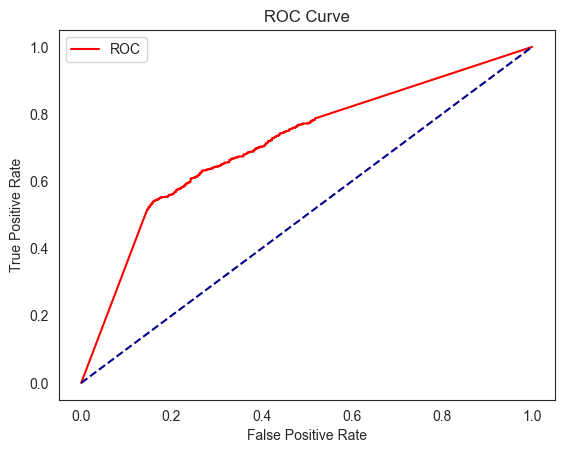

In [399]:
# roc curve for rock and hip hop
from sklearn.metrics import roc_curve


y_pred_prob_test_knn_res = best_model_knn_res.predict_proba(test_features_pca)[:, 1]

fpr_knn_res, tpr_knn_res, thresholds_knn_res = roc_curve(test_labels, y_pred_prob_test_knn_res, pos_label="Hip-Hop")

plt.plot(tpr_knn_res, fpr_knn_res, color="red", label="ROC")
plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [400]:
y_pred_test_proba_res = best_model_knn_res.predict_proba(test_features_pca)

best_th = umbral_optimo(y_pred_test_proba_res,binary_test_labels,thresholds_knn_res)
print('El mejor umbral es {:.4f}.'.format(best_th))

El mejor umbral es 0.6250.


In [401]:
y_pred_proba = best_model_dt_res.predict_proba(test_features_pca)

umbral = 0.6250
y_pred_knn_res = (y_pred_proba[:, 1] >= umbral).astype(int)

# Compute and print metrics
print("Accuracy: {}".format(best_model_knn_res.score(test_features_pca, test_labels)))
print(classification_report(binary_test_labels, y_pred_knn_res))
print("Tuned Model Parameters: {}".format(best_model_knn_res.best_params_))

Accuracy: 0.6550308008213552
              precision    recall  f1-score   support

           0       0.30      0.89      0.45       536
           1       0.96      0.53      0.68      2386

    accuracy                           0.60      2922
   macro avg       0.63      0.71      0.57      2922
weighted avg       0.84      0.60      0.64      2922

Tuned Model Parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}


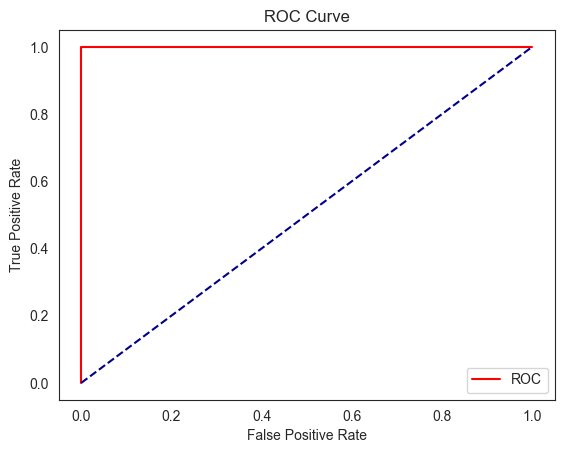

In [402]:
# roc curve for rock and hip hop
from sklearn.metrics import roc_curve


y_pred_prob_train_knn_res = best_model_knn_res.predict_proba(train_features_pca_res)[:, 1]

fpr_knn_res, tpr_knn_res, thresholds_knn_res = roc_curve(train_labels_res, y_pred_prob_train_knn_res, pos_label="Hip-Hop")

plt.plot(tpr_knn_res, fpr_knn_res, color="red", label="ROC")
plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [403]:
y_pred_train_proba_res = best_model_knn_res.predict_proba(train_features_pca_res)

best_th = umbral_optimo(y_pred_train_proba_res,binary_train_labels_res,thresholds_knn_res)
print('El mejor umbral es {:.4f}.'.format(best_th))

El mejor umbral es 1.0000.


In [404]:
y_pred_proba = best_model_dt_res.predict_proba(train_features_pca_res)

umbral = 1.0000
y_pred_knn_res = (y_pred_proba[:, 1] >= umbral).astype(int)

# Compute and print metrics
print("Accuracy: {}".format(best_model_knn_res.score(train_features_pca_res, train_labels_res)))
print(classification_report(binary_train_labels_res, y_pred_knn_res))
print("Tuned Model Parameters: {}".format(best_model_knn_res.best_params_))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       0.59      1.00      0.74      5540
           1       1.00      0.29      0.45      5540

    accuracy                           0.65     11080
   macro avg       0.79      0.65      0.60     11080
weighted avg       0.79      0.65      0.60     11080

Tuned Model Parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}


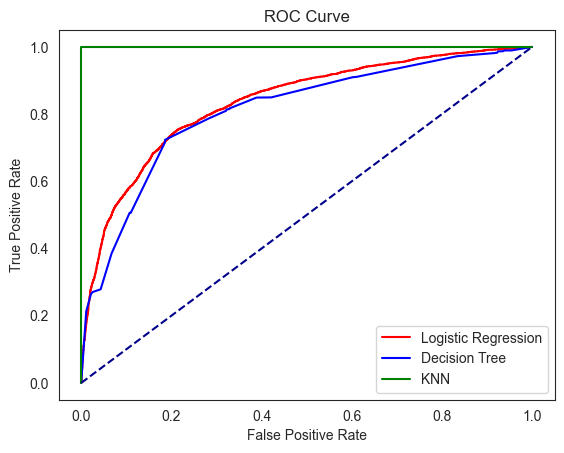

In [405]:
plt.plot(tpr_lr_res, fpr_lr_res, color="red", label="Logistic Regression")
plt.plot(tpr_dt_res, fpr_dt_res, color="blue", label="Decision Tree")
plt.plot(tpr_knn_res, fpr_knn_res, color="green", label="KNN")
plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()